In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns

### Data path 

In [8]:
curr_path = os.getcwd()
data_dir = os.path.join(curr_path, "get-data/dataset")
match_csv = os.path.join(data_dir, "match.csv")
pro_list_csv = os.path.join(data_dir, "pro_list_updated.csv")

### 1. Quick overview of the match dataset

We will plot some basic descriptive statistics regarding our dataset.

In [9]:
match_df = pd.read_csv(match_csv)

In [10]:
print("Dataset of shapes : ", match_df.shape)
match_df.head()

Dataset of shapes :  (95228, 117)


,gameCreation,gameDuration,gameEndTimestamp,gameId,gameMode,gameName,gameStartTimestamp,gameType,gameVersion,mapId,...,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win
0,1648812630000,970,1648813616016,5803019526,CLASSIC,teambuilder-match-5803019526,1648812645497,MATCHED_GAME,12.6.430.6775,11,...,65,0,0,0,0,30,9,5,17,True
1,1648810785000,976,1648811776409,5803085882,CLASSIC,teambuilder-match-5803085882,1648810799996,MATCHED_GAME,12.6.430.6775,11,...,2831,0,0,2,0,19,6,1,14,False
2,1648761974000,1442,1648763435969,5802380209,CLASSIC,teambuilder-match-5802380209,1648761993552,MATCHED_GAME,12.6.430.6775,11,...,1106,1,4,2,0,71,15,6,36,True
3,1648759752000,1352,1648761123399,5802324003,CLASSIC,teambuilder-match-5802324003,1648759771064,MATCHED_GAME,12.6.430.6775,11,...,827,0,2,3,0,51,13,5,28,True
4,1648758011000,1175,1648759218601,5802088187,CLASSIC,teambuilder-match-5802088187,1648758043381,MATCHED_GAME,12.6.430.6775,11,...,104,0,3,3,0,42,10,1,22,True


#### 1.1 Exploratory Analysis

In this part, we will explore the different feature's distribution. 
We will process in the following order : 
       
    1 - We will take a look at missing values
    2 - We will remove unnecessary features
    3 - We will plot some basic histogrames and distribution
    4 - We will proceed in a multivariate analysis of key features
    5 - We will study the correlation between our features

In [11]:
# 1 - Missing values 
for col in match_df.columns: 
    print(f"Column : {col} has {match_df[col].isna().sum()} missing values")

Column : gameCreation has 0 missing values
Column : gameDuration has 0 missing values
Column : gameEndTimestamp has 0 missing values
Column : gameId has 0 missing values
Column : gameMode has 0 missing values
Column : gameName has 0 missing values
Column : gameStartTimestamp has 0 missing values
Column : gameType has 0 missing values
Column : gameVersion has 0 missing values
Column : mapId has 0 missing values
Column : platformId has 0 missing values
Column : queueId has 0 missing values
Column : tournamentCode has 95228 missing values
Column : assists has 0 missing values
Column : baronKills has 0 missing values
Column : bountyLevel has 0 missing values
Column : champExperience has 0 missing values
Column : champLevel has 0 missing values
Column : championId has 0 missing values
Column : championName has 0 missing values
Column : championTransform has 0 missing values
Column : consumablesPurchased has 0 missing values
Column : damageDealtToBuildings has 0 missing values
Column : damag

In [12]:
match_df = match_df.drop_duplicates()

 - riotIdTagline, riotIdName, tournamentCode are useless and do not carry relevant informations
 - We will try to replace the teamPosition's nan values with values from other features

In [13]:
#### Focus on riotIdTagline, riotIdName, tournamentCode and teamPosition

unique_riot_tagline = match_df["riotIdTagline"].unique()
print("riotIdTagline unique values : ", unique_riot_tagline) 

unique_riot_name = match_df["riotIdName"].unique()
print("riotIdName unique values : ", unique_riot_name) 

unique_team_position = match_df["teamPosition"].unique()
print("teamPosition unique values : ", unique_team_position) 

unique_tournamenet = match_df["tournamentCode"].unique()
print("tournamentCode unique values :", unique_tournamenet)

riotIdTagline unique values :  [nan]
riotIdName unique values :  [nan]
teamPosition unique values :  ['UTILITY' 'BOTTOM' 'MIDDLE' 'TOP' 'JUNGLE' nan]
tournamentCode unique values : [nan]


We would like to add a role to any player. 
We have 4 features to play with : 

In [14]:
print("lane unique values :", match_df["lane"].unique())
print("role unique values :", match_df["role"].unique())
print("teamPosition unique values :", match_df["teamPosition"].unique())
print("individualPosition unique values :", match_df["individualPosition"].unique())

lane unique values : ['NONE' 'BOTTOM' 'JUNGLE' 'MIDDLE' 'TOP']
role unique values : ['SUPPORT' 'SOLO' 'CARRY' 'NONE' 'DUO']
teamPosition unique values : ['UTILITY' 'BOTTOM' 'MIDDLE' 'TOP' 'JUNGLE' nan]
individualPosition unique values : ['UTILITY' 'BOTTOM' 'MIDDLE' 'TOP' 'JUNGLE' 'Invalid']


According to the api : 
    <i>"Generally the recommendation is to use the teamPosition field over the individualPosition field."</i>

<AxesSubplot:xlabel='teamPosition', ylabel='Count'>

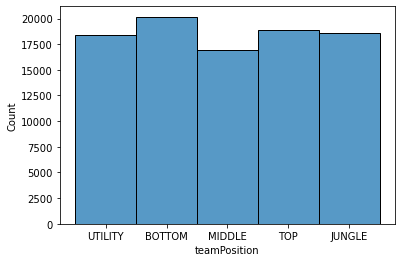

In [15]:
match_df = match_df.dropna(subset=['teamPosition'])
sns.histplot(match_df["teamPosition"])

In [16]:
# match_df[match_df["teamPosition"] == "BOTTOM"]["role"].value_counts()
# match_df = match_df.dropna(subset=['teamPosition'])
# match_df["teamPosition"] = np.where(match_df["teamPosition"] == "UTILITY", match_df["role"], match_df["teamPosition"])

# print("Unique values after replacement : ", match_df["teamPosition"].value_counts())

In [17]:
# 2 - Remove irrelevant features : we now have a total of 109 features
to_remove = [
    "gameId", "gameMode", "gameName", "gameType",
    "mapId", "puuid", 
    "riotIdTagline", "riotIdName", 
    "championId", "champExperience", "role", "individualPosition", "lane", 
    "summonerId", "summonerName","queueId", "participantId", 
    "profileIcon", "summonerLevel"
]
# match_df.drop(["role", "individualPosition", "lane"], axis=1, inplace=True)
# match_df.drop("summonerId", axis=1, inplace=True)
# match_df.drop("summonerName", axis=1, inplace=True)
# match_df.drop("championName", axis=1, inplace=True)
# match_df.drop(["queueId", "participantId", "profileIcon"], axis=1, inplace=True)


match_df = match_df.drop(to_remove, axis=1)
print("Dataset shapes after removal : ", match_df.shape)

Dataset shapes after removal :  (93099, 98)


#### converting from seconds to min

In [18]:
match_df["gameDuration"] = match_df["gameDuration"] / 60 

In [19]:
match_df.groupby("win")["gameDuration"].describe()

,count,mean,std,min,25%,50%,75%,max
win,,,,,,,,
False,44027.0,25.764809,6.343523,3.166667,21.550000,25.633333,29.916667,55.15
True,49072.0,25.246280,6.306076,3.166667,20.966667,25.100000,29.400000,55.10


<AxesSubplot:xlabel='win', ylabel='gameDuration'>

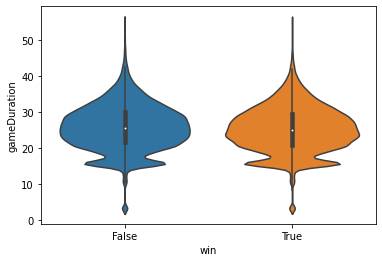

In [20]:
sns.violinplot(y=match_df["gameDuration"], x=match_df["win"])

#### Study of the distribution of the "Win" variable 


In [21]:
print("unique values for the win feature ", match_df["win"].unique())

unique values for the win feature  [ True False]


In [22]:
# let's convert everything to the same type 
# depending on the game version, we might have True or Win in a case of victory
# we convert everything to 1/0
match_df["win"] = match_df["win"].astype("bool")
match_df["win"] = match_df["win"].astype("int")

Win rate over the dataset : 52.71 % 
Loose rate over the dataset : 47.29 %


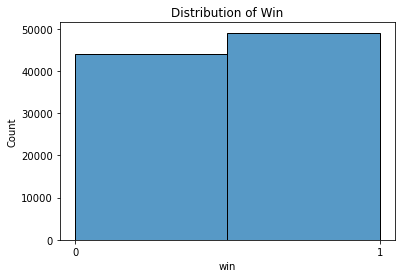

In [23]:
sns.histplot(match_df["win"], bins=2)
plt.xticks([0, 1])
plt.title("Distribution of Win")
win_frq, loose_frq = match_df["win"].value_counts(True)
print(f"Win rate over the dataset : {win_frq * 100:.2f} % ")
print(f"Loose rate over the dataset : {loose_frq * 100:.2f} %")
plt.show()

#### Study of kills/deaths/assists

<AxesSubplot:xlabel='deaths', ylabel='Count'>

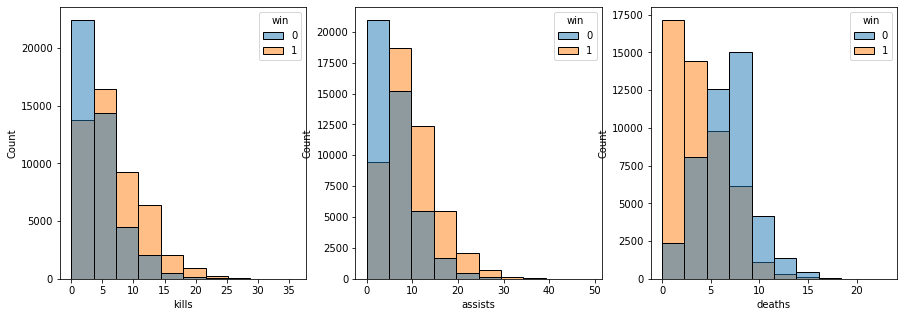

In [24]:
f, ax = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(match_df, x="kills", bins=10, ax=ax[0], hue="win")
sns.histplot(match_df,x="assists", bins=10, ax=ax[1], hue="win")
sns.histplot(match_df,x="deaths", bins=10, ax=ax[2], hue="win")

win regarding kill streaks

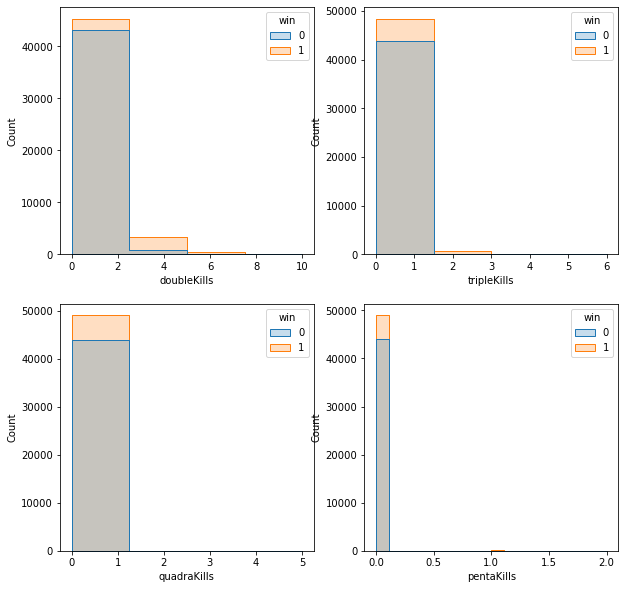

In [25]:
f, ax = plt.subplots(2,2, figsize=(10,10))
sns.histplot(match_df, x="doubleKills", bins=4, ax=ax[0, 0], hue="win", element="step")
sns.histplot(match_df, x="tripleKills", bins=4, ax=ax[0,1], hue="win", element="step")
sns.histplot(match_df, x="quadraKills", bins=4, ax=ax[1,0], hue="win", element="step")
sns.histplot(match_df, x="pentaKills",ax=ax[1,1], hue="win", element="step")
plt.show()

### There is a clear correlation between the streaks and the victory

Text(0.5, 1.0, 'doubleKills per game state')

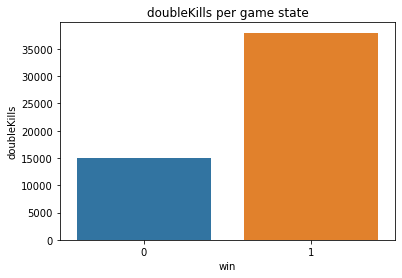

In [26]:
streak_data = match_df.groupby("win")[["doubleKills", "tripleKills", "quadraKills", "pentaKills"]].sum().reset_index()
sns.barplot(data=streak_data, y="doubleKills", x="win")
plt.title("doubleKills per game state")

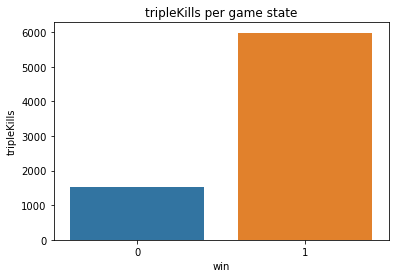

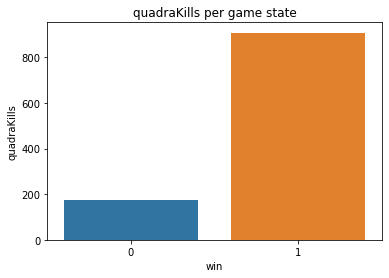

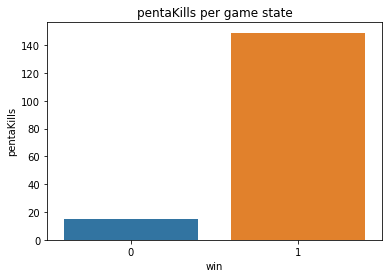

In [27]:
sns.barplot(data=streak_data, y="tripleKills", x="win")
plt.title("tripleKills per game state")
plt.show()

sns.barplot(data=streak_data, y="quadraKills", x="win")
plt.title("quadraKills per game state")
plt.show()

sns.barplot(data=streak_data, y="pentaKills", x="win")
plt.title("pentaKills per game state")
plt.show()

#### game duration distribution

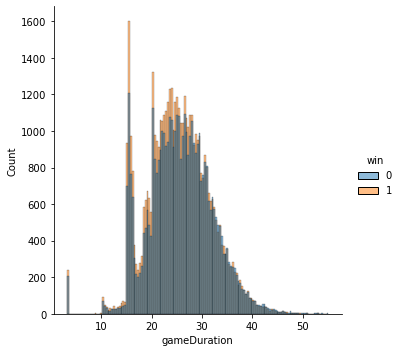

In [28]:
sns.displot(match_df, x="gameDuration", hue="win")

#### Study of championName

<AxesSubplot:xlabel='index', ylabel='championName'>

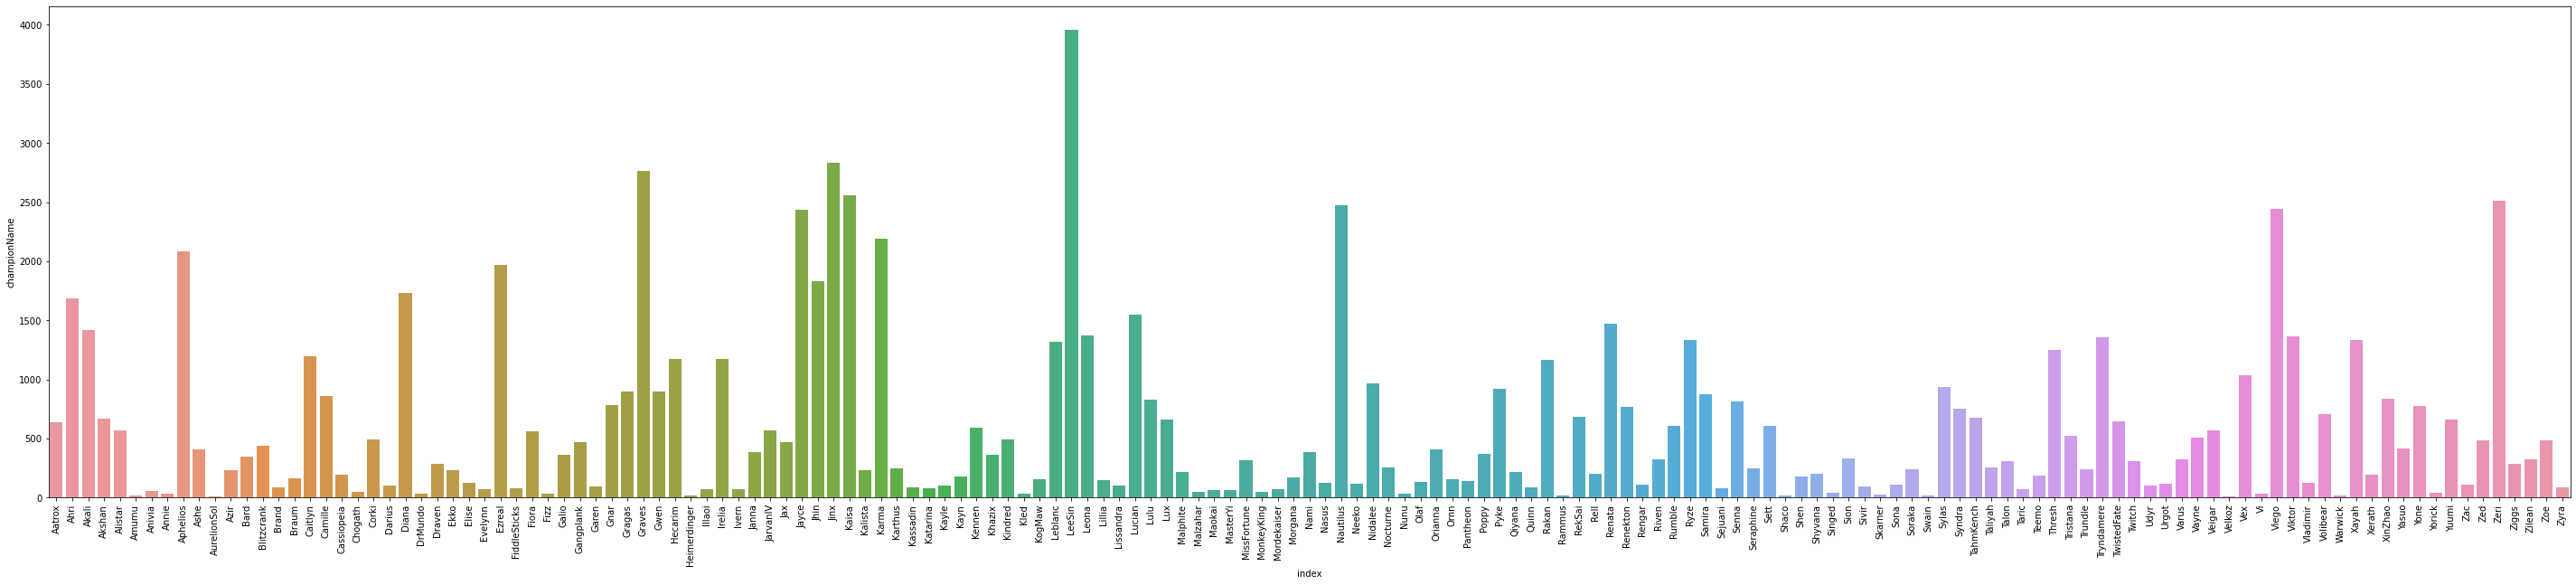

In [29]:
plt.figure(figsize=(50,10))
champ_dist = match_df["championName"].value_counts().reset_index()
champ_dist = champ_dist.sort_values("index")
plt.xticks(rotation=90)
sns.barplot(x=champ_dist["index"], y=champ_dist["championName"])

#### win rate per champion

In [30]:
match_df[match_df["championName"] == "Maokai"]["win"].value_counts()
match_df[match_df["championName"] == "Janna"][["turretKills", "turretTakedowns"]]

,turretKills,turretTakedowns
101,0,4
883,2,6
927,3,5
3518,0,1
3584,0,5
...,...,...
93046,0,1
93047,1,6
94045,0,1
94104,2,6


<AxesSubplot:xlabel='championName', ylabel='win'>

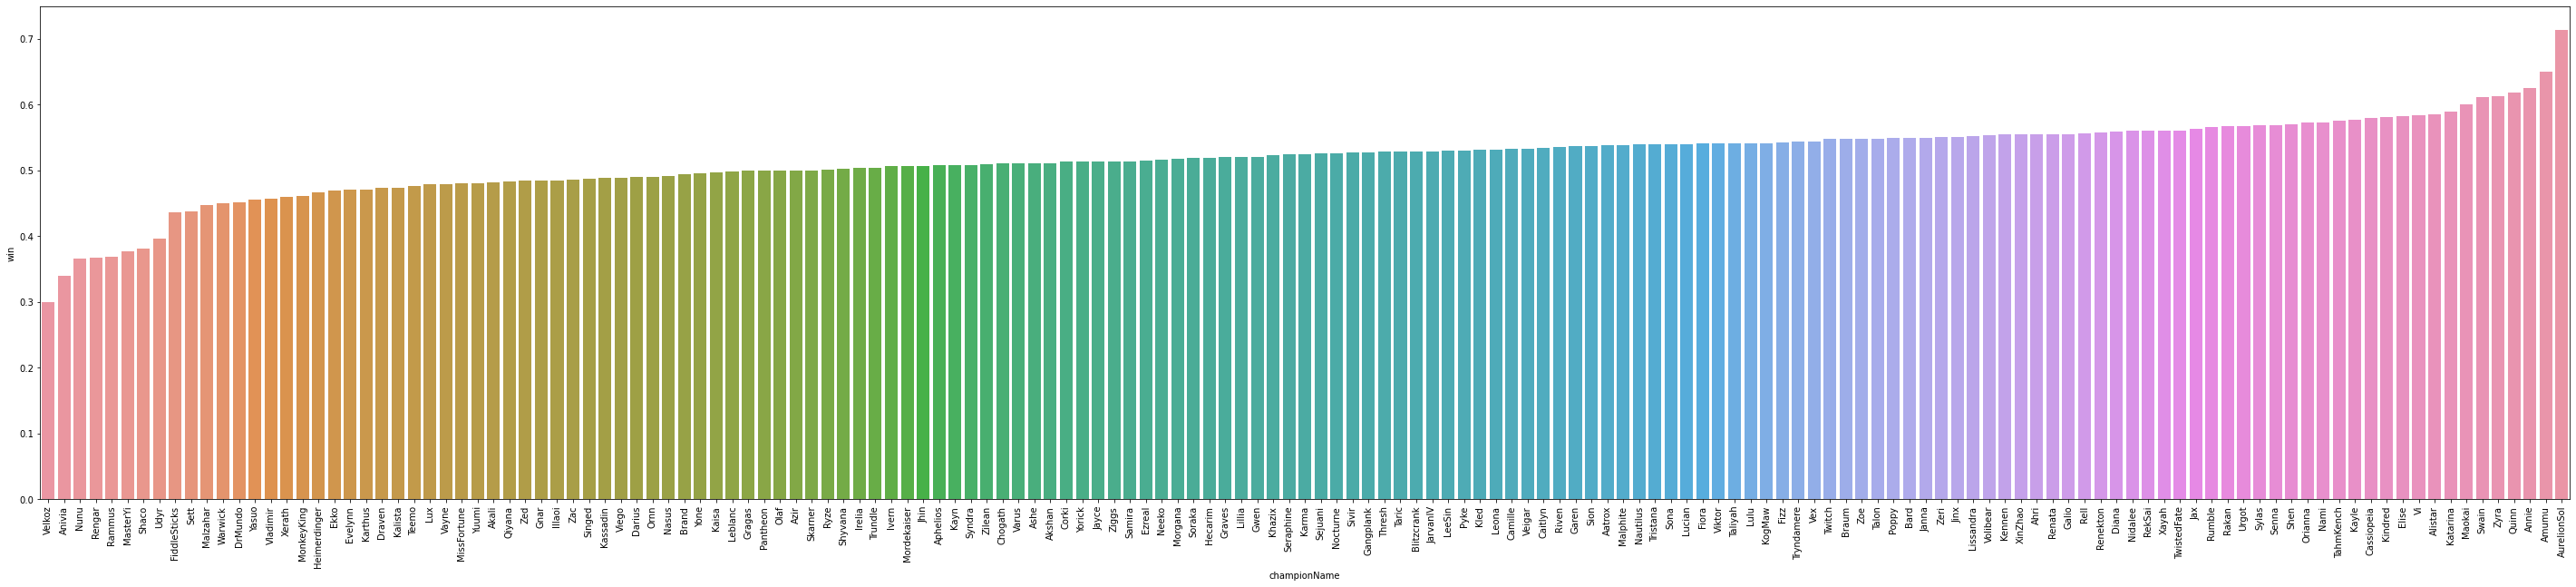

In [31]:
plt.figure(figsize=(50,10))
winrate_champ = match_df.groupby("championName")["win"].mean().reset_index()
winrate_champ = winrate_champ.sort_values("win")
plt.xticks(rotation=90)
sns.barplot(data=winrate_champ, x="championName", y="win")

### Observations regarding the variable "kills", "deaths", "assists" : 

#### Clear and obvious correlation : 

We observe that the more kills and assits, and the least deaths you have during a game, for any particular teamPosition, the more likely you are to win the game. Even if it sounds obvious, the following distribution reinforce our hypothesis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


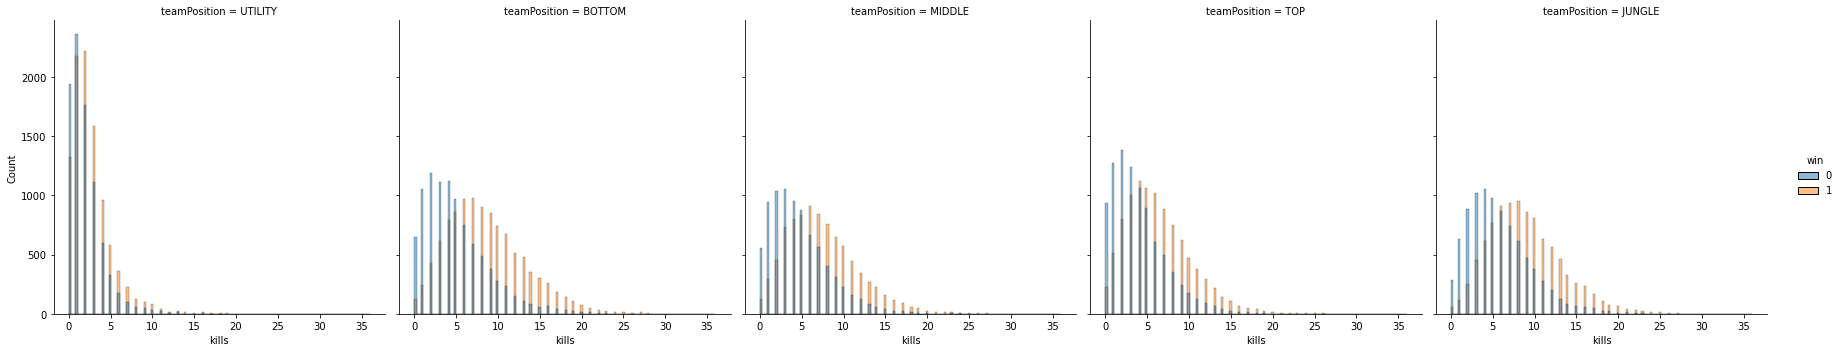

In [32]:
sns.displot(match_df, x="kills",  ax=ax[0], hue="win", col="teamPosition")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


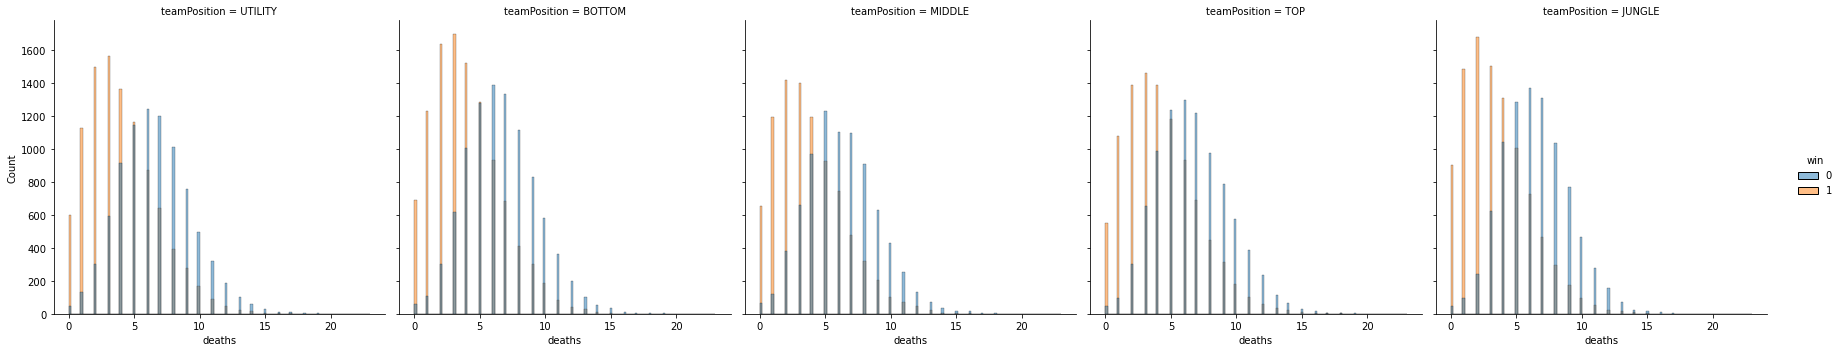

In [33]:
sns.displot(match_df, x="deaths",  ax=ax[0], hue="win", col="teamPosition")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


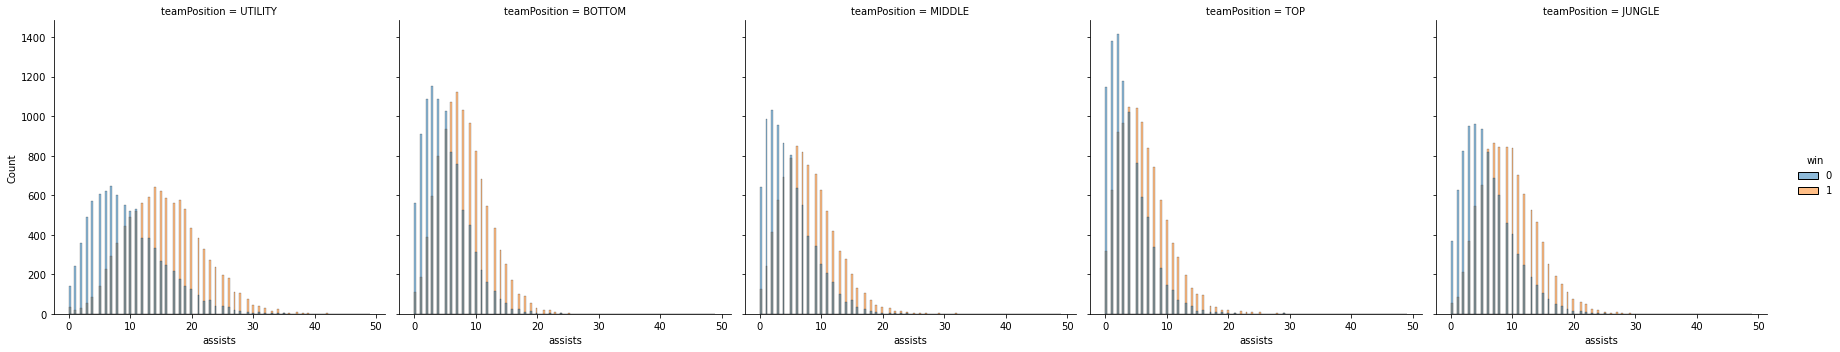

In [34]:
sns.displot(match_df, x="assists",  ax=ax[0], hue="win", col="teamPosition")

### Observations regarding the variable "GoldEearned" : 

#### Clear and obvious correlation (again) : 

We observe that the more gold you earn during the game, the more likely you are to win the game (obviously). Note that the fluctuation below 2500 are probably due to a match ended in surrender

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


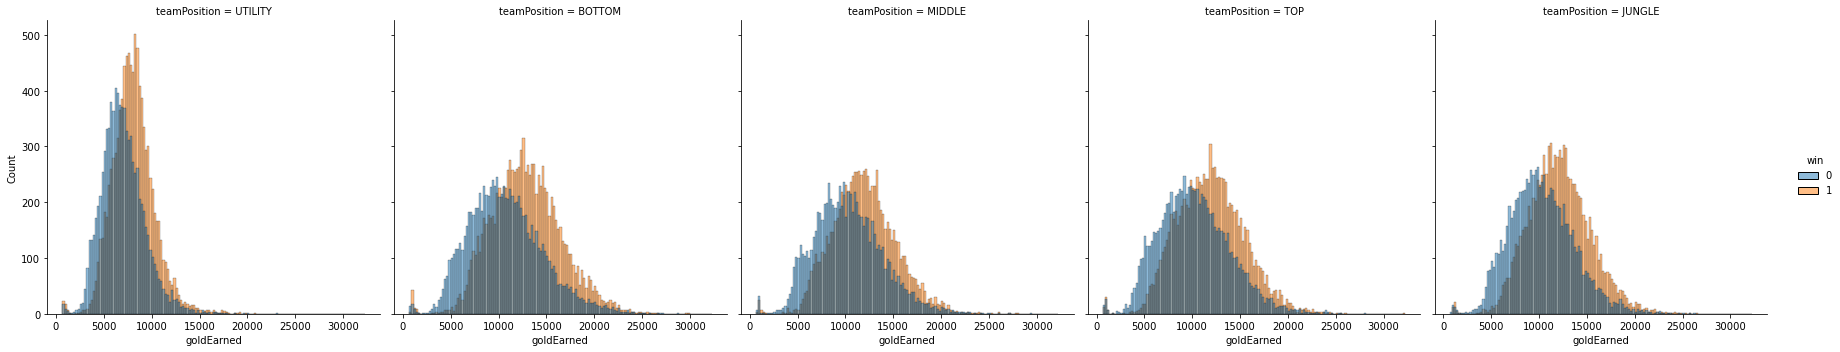

In [35]:
sns.displot(match_df, x="goldEarned",  ax=ax[0], hue="win", col="teamPosition")

### Analysis of objectives : 

#### We would like to answer the following questions : 

- <strong>Do players who use more visions tend to avoid being killed ?</strong> 
    <br><i>-> hypothesis : Having vision allows you to avoid being traped by your enemies</i>
<br>


- <strong>Does the steal of objectives strongly correlates with the victory ?</strong> 
    <br><i>-> hypothesis : As the steal of objectives play a key role in the mental of the ennemy team, and as it provides golds and additional enhancement, we believe that the correlation is strong and positive</i>
    <br><strong>Result : </strong> The steal of objectives is a rare phenomenon. But when it happens, it is more likely for the player to win the game. We see that on the 14 games where players stole 2 objectives, they constantly end up in winnin the game 
<br>

- <strong>What is the impact of vision in objective stealing ?</strong> 
    <br><i>-> hypothesis : We believe that vision wards (item that allow the user to have vision on the map in a particular zone) have an impact in the ability of a team to steal objectives</i>
    <br><strong>Result : </strong>We cannot say anything regarding the relation between the steal of objectives and the visionScore. Future work involving the global team stats such as number of objectives per team will probably consider visionScore as a crucial element
<br>


- <strong>Do players contributing to the very first kill are more likely to win the game ?</strong> 
    <br><i>-> hypothesis : We believe that taking the first kill of the game brings you confidence and put your team in a good state of mind</i>
    <br><strong>Result : </strong>Taking the first kill indeed increases the probability of a player to win the match. It is still true for helping a mate taking the first kill of the match
<br>

        

Distribution of the vision score and its impact on the victory: 

Observations : The Utility teamPosition can be seen as a support. The support has items allowing him to use special vision items, more times than other roles. The distributions of the visionScore for a support, conditioned by the victory, are very similar. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


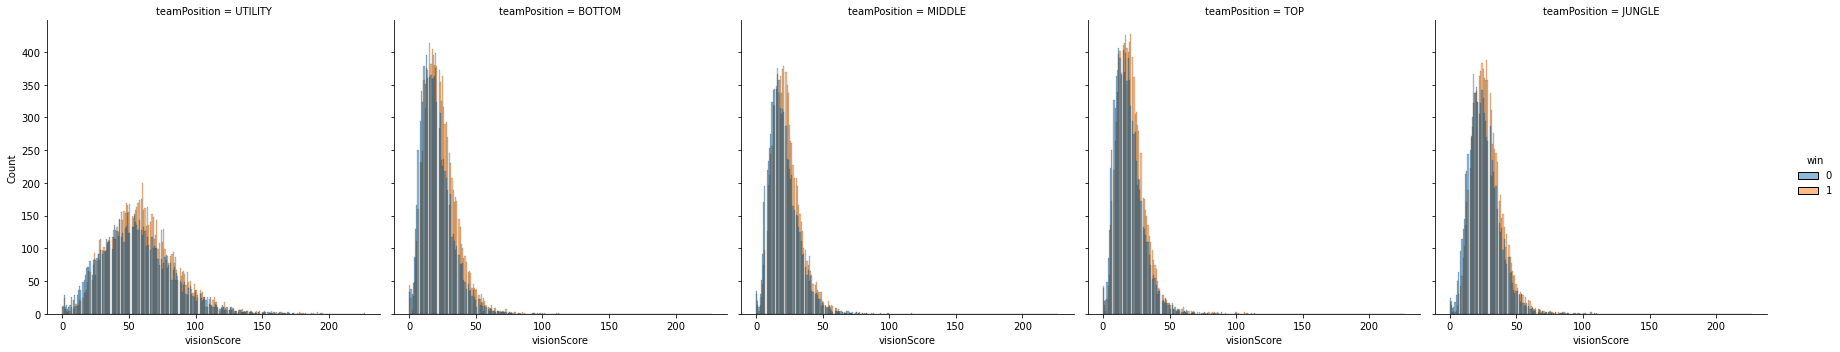

In [36]:
sns.displot(match_df, x="visionScore",  ax=ax[0], hue="win", col="teamPosition")

<strong>Kolmogorov-Smirnov godness of fitting between visionScore_win and visionScore_loss </strong>. 
The null hypothesis is that the two distributions are identical, F(x)=G(x) for all x; the alternative is that they are not identical.
If the KS statistic is small or the p-value is high, then we cannot reject the null hypothesis in favor of the alternative.



#### The p-value is lower than 0.05, thus it is very likely that both variables have a different distribution :

The win/loss impacts the distirbution of the visionScore. We cannot neglect the impact of the vision score of the Support.

In [37]:
from scipy.stats import ks_2samp, zscore

visionScore_win = match_df[match_df["win"] == 1]["visionScore"].values
visionScore_loss = match_df[match_df["win"] == 0]["visionScore"].values

d, p_value = ks_2samp(visionScore_win, visionScore_loss)
print("distance : ",d)
print("p value : ", p_value)

distance :  0.08602860496081305
p value :  7.156511850391335e-150


#### vision and objectivesStolen

<AxesSubplot:xlabel='objectivesStolen', ylabel='visionScore'>

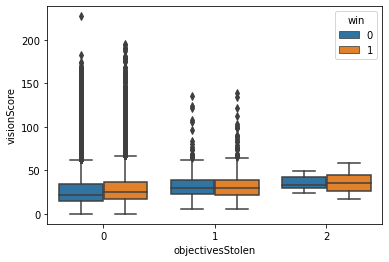

In [38]:
sns.boxplot(data=match_df, y="visionScore", x="objectivesStolen", hue="win")

#### vision and objectivesStolenAssists

<AxesSubplot:xlabel='objectivesStolenAssists', ylabel='visionScore'>

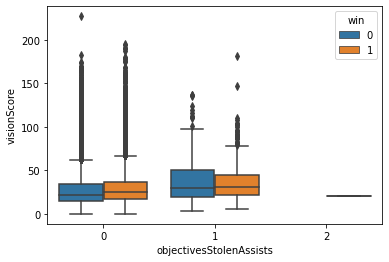

In [39]:
sns.boxplot(data=match_df, y="visionScore", x="objectivesStolenAssists", hue="win")

#### It is a rare phenomenon for players to steal objectives

In [40]:
print("ObjectiveStolen value counts : ", match_df["objectivesStolen"].value_counts())

ObjectiveStolen value counts :  0    91833
1     1242
2       24
Name: objectivesStolen, dtype: int64


In [41]:
print("ObjectiveStolen value counts : ", match_df["objectivesStolenAssists"].value_counts())

ObjectiveStolen value counts :  0    92599
1      499
2        1
Name: objectivesStolenAssists, dtype: int64


In [42]:
print("Win rate per Objective Stolen")
print(match_df.groupby("objectivesStolen")["win"].mean())

print("Objective Stolen Assist")
print(match_df.groupby("objectivesStolenAssists")["win"].mean())

Win rate per Objective Stolen
objectivesStolen
0    0.526183
1    0.593398
2    0.583333
Name: win, dtype: float64
Objective Stolen Assist
objectivesStolenAssists
0    0.526755
1    0.589178
2    1.000000
Name: win, dtype: float64


### Does the first blood impacts the victory ? 

<strong>hypothesis : </strong> It might. Indeed, players who killed the first person in the game might gain confidence. On the other hand, the team victim of the first blood, might start on a fragile basis 

In [43]:
match_df["firstBloodKill"] = match_df["firstBloodKill"].astype(int)

<AxesSubplot:xlabel='firstBloodKill', ylabel='count'>

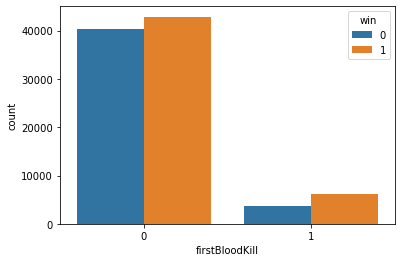

In [44]:
sns.countplot(data=match_df, x="firstBloodKill", hue="win")

#### When the player is responsible of the firstBlood, he is more likely to win the game 

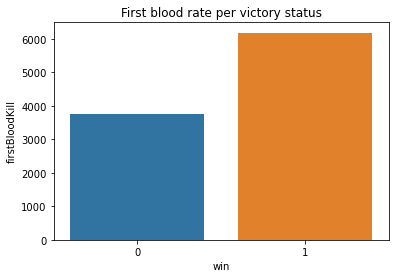

In [45]:
fb_winrate = match_df[match_df["firstBloodKill"] == 1].groupby("win")["firstBloodKill"].sum().reset_index()

sns.barplot(data=fb_winrate, y="firstBloodKill", x="win")
plt.title("First blood rate per victory status")
plt.show()

#### When the player has contributed in the first blood , he is more likely to win the game 

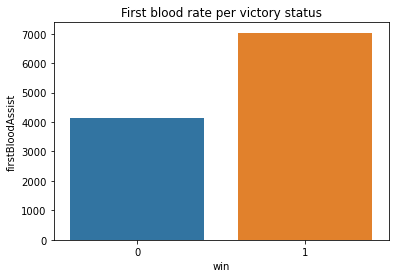

In [46]:
fb_winrate = match_df[match_df["firstBloodAssist"] == 1].groupby("win")["firstBloodAssist"].sum().reset_index()
sns.barplot(data=fb_winrate, y="firstBloodAssist", x="win")
plt.title("First blood rate per victory status")
plt.show()

### Analysis of game versions and dates

Exploratory analysis of the evaluation of the win rates over months during the season 12. We would like to see if we obtain different distributions from one path to another 

In [47]:
print("All different game versions", match_df["gameVersion"].unique())

All different game versions ['12.6.430.6775' '12.5.425.9171' '12.6.432.1258' '12.1.416.4011'
 '12.3.421.5967' '12.2.419.1399' '12.1.414.6260' '12.6.431.7988'
 '12.4.423.2790' '12.3.421.3734' '12.3.420.4308' '12.2.418.8114']


In [48]:
versions = match_df["gameVersion"].value_counts()
print(versions)

12.5.425.9171    43955
12.4.423.2790    10555
12.1.416.4011     9976
12.3.421.5967     7891
12.6.432.1258     7037
12.2.419.1399     6449
12.6.430.6775     4928
12.1.414.6260      762
12.3.420.4308      547
12.3.421.3734      429
12.6.431.7988      341
12.2.418.8114      229
Name: gameVersion, dtype: int64


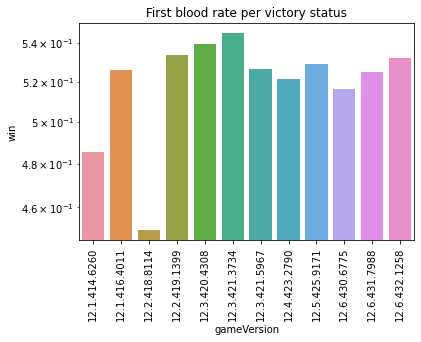

In [49]:
wr_version = match_df.groupby("gameVersion")[["win"]].mean().reset_index()
wr_version
sns.barplot(data=wr_version, y="win", x="gameVersion")
plt.title("First blood rate per victory status")
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

#### date formatting

In [50]:
def to_date(timestamp): 
    res = datetime.fromtimestamp(timestamp / 1000).strftime('%Y-%m-%d')
    return res

In [51]:
from datetime import datetime
match_df["gameCreation"] = match_df["gameCreation"].apply(lambda x: to_date(x))

In [52]:
match_df = match_df.sort_values(by="gameCreation")

### Evolution of turretTakedowns over time

<AxesSubplot:title={'center':'turretTakedowns over time'}, xlabel='gameCreation', ylabel='turretTakedowns'>

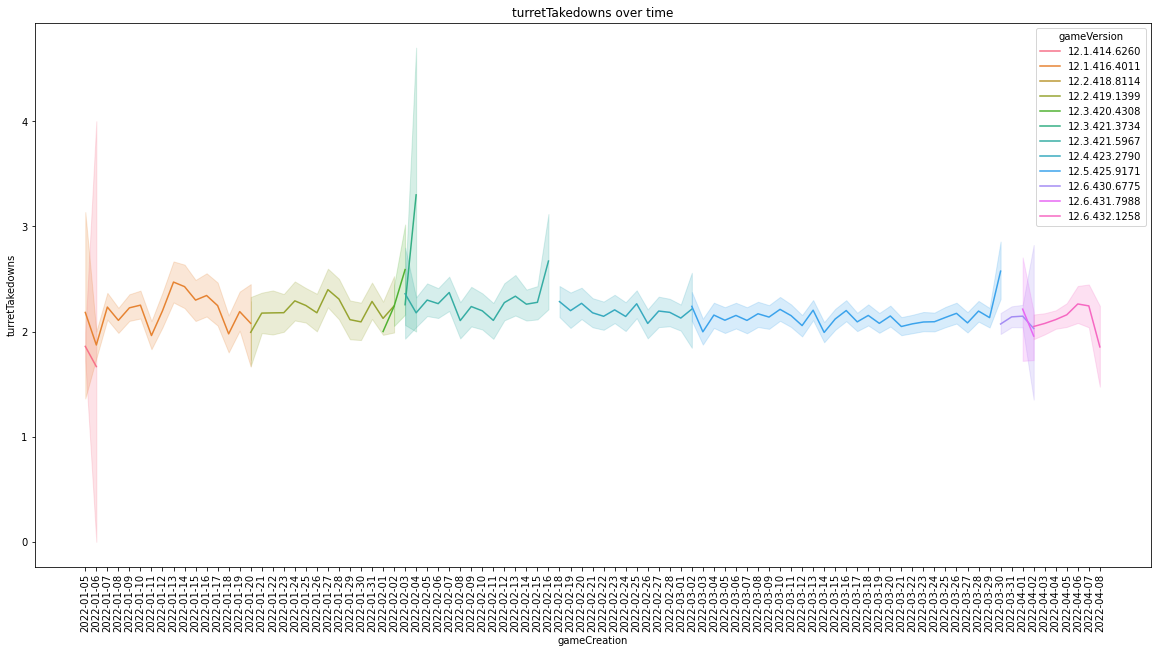

In [53]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("turretTakedowns over time")
sns.lineplot(data=match_df, x="gameCreation", y="turretTakedowns", hue="gameVersion")

### Evolution of penta kills over time

<AxesSubplot:title={'center':'Penta Kills over time'}, xlabel='gameCreation', ylabel='pentaKills'>

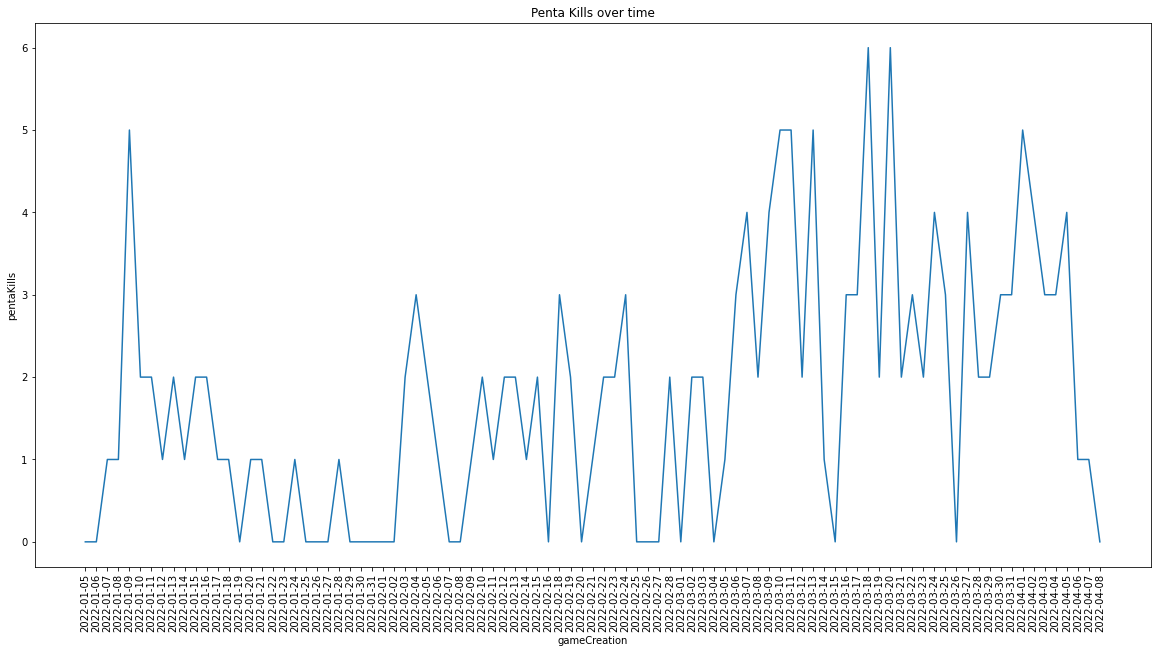

In [54]:
penta_time = match_df.groupby("gameCreation")["pentaKills"].sum().reset_index()

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Penta Kills over time")
sns.lineplot(data=penta_time, x="gameCreation", y="pentaKills")

### Evolution of kills over time 

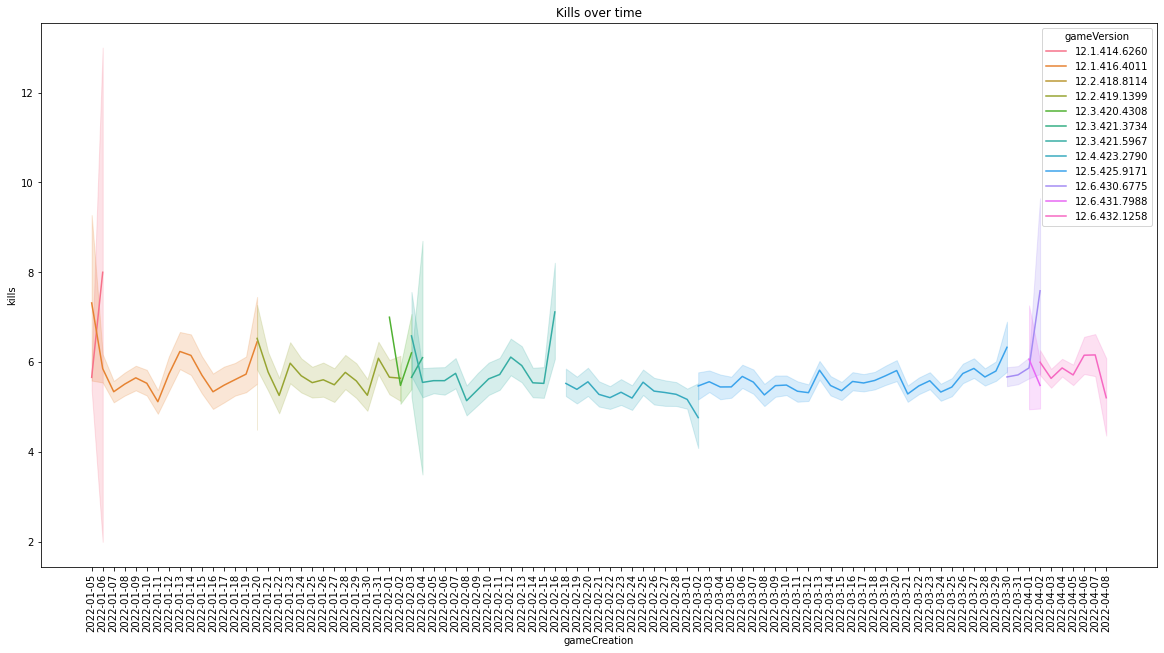

In [55]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Kills over time")
sns.lineplot(data=match_df, x="gameCreation", y="kills", hue="gameVersion")
plt.show()

### Bounty level per game version

<AxesSubplot:title={'center':'Kills over time'}, xlabel='gameVersion', ylabel='bountyLevel'>

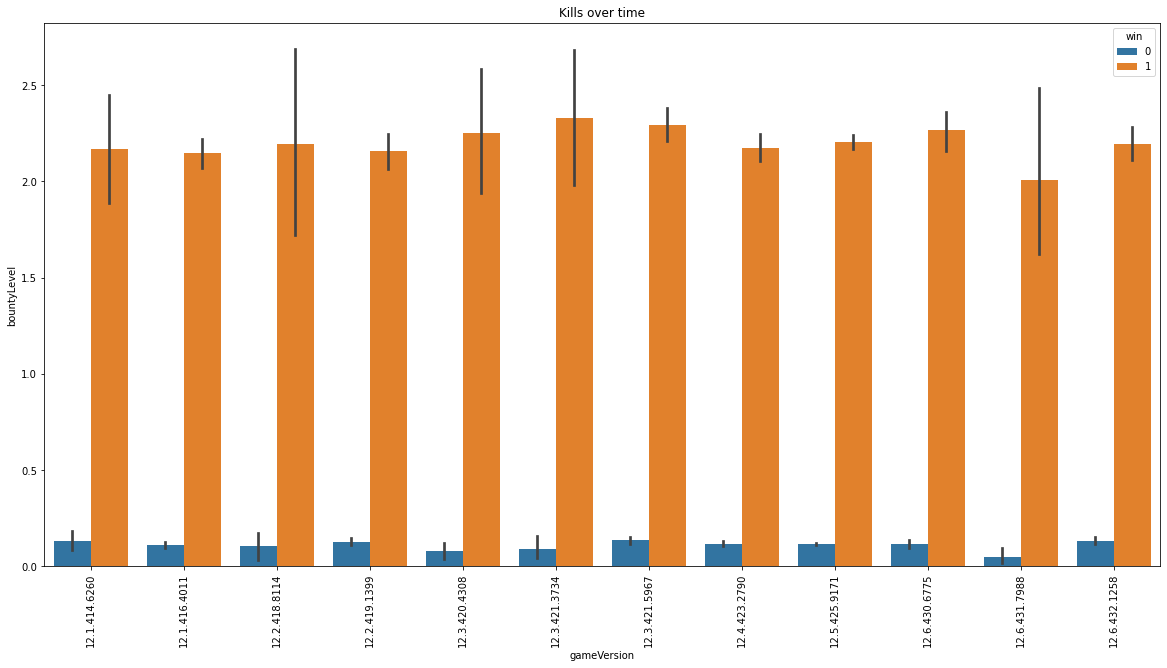

In [56]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Kills over time")
sns.barplot(data=match_df, x="gameVersion", y="bountyLevel", hue="win")

## One hot encoding

-> of plateformID <br>
-> gameVersion <br>
-> of items (we have around 200 items)


In [57]:
match_df = match_df.join(pd.get_dummies(match_df["platformId"]))

In [58]:
match_df.drop("platformId", axis=1,inplace=True)

In [59]:
pd.get_dummies(match_df[f"item2"])

,0,1001,1004,1006,1011,1018,1026,1027,1028,1029,...,7017,7018,7019,7020,7021,7022,7023,7024,8001,8020
24006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61331,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
item_cols = []

for i in range(6): 
    item_cols.extend(
        match_df[f"item{i+1}"].to_list()
    )
    
item_cols = set(item_cols)

In [61]:
items = pd.DataFrame(columns=item_cols)

for i in range(7): 
    items = items.add(pd.get_dummies(match_df[f"item{i}"].astype(int)), fill_value=0)

In [62]:
match_df = match_df.join(items)

In [63]:
for i in range(7):
    match_df.drop(f"item{i}", axis=1, inplace=True)

In [64]:
# game version 
match_df = match_df.join(pd.get_dummies(match_df["gameVersion"]))

In [65]:
match_df.drop("gameVersion", axis=1, inplace=True)

### Let's recap our new changes 

In [66]:
# 1 - Missing values 
for col in match_df.columns: 
    print(f"Column : {col} has {match_df[col].isna().sum()} missing values")

Column : gameCreation has 0 missing values
Column : gameDuration has 0 missing values
Column : gameEndTimestamp has 0 missing values
Column : gameStartTimestamp has 0 missing values
Column : tournamentCode has 93099 missing values
Column : assists has 0 missing values
Column : baronKills has 0 missing values
Column : bountyLevel has 0 missing values
Column : champLevel has 0 missing values
Column : championName has 0 missing values
Column : championTransform has 0 missing values
Column : consumablesPurchased has 0 missing values
Column : damageDealtToBuildings has 0 missing values
Column : damageDealtToObjectives has 0 missing values
Column : damageDealtToTurrets has 0 missing values
Column : damageSelfMitigated has 0 missing values
Column : deaths has 0 missing values
Column : detectorWardsPlaced has 0 missing values
Column : doubleKills has 0 missing values
Column : dragonKills has 0 missing values
Column : firstBloodAssist has 0 missing values
Column : firstBloodKill has 0 missing v

### Let's drop more variables

In [67]:
match_df = match_df.drop("tournamentCode", axis=1)

## Feature Selection : Experiment 1 

Our aim is to select the most relevant features to maximize the performance of our models 
Feature selection process : 

-> Amount of Variation <br>
-> Correlation <br>
-> Correlation with target <br>
-> PCA <br>
-> Cluster analysis <br>

### Analysis of variation

In [68]:
# plt.figure(figsize=(100,100))
match_variance = match_df.var().reset_index()
match_std = match_df.std().reset_index()

C:\Users\karna\AppData\Local\Temp\ipykernel_26880\3305234293.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  match_variance = match_df.var().reset_index()
C:\Users\karna\AppData\Local\Temp\ipykernel_26880\3305234293.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  match_std = match_df.std().reset_index()


In [69]:
match_variance.rename(columns={0: "variance"}, inplace=True)
match_std.rename(columns={0: "std"}, inplace=True)

In [70]:
match_variance

,index,variance
0,gameDuration,4.005720e+01
1,gameEndTimestamp,5.192832e+18
2,gameStartTimestamp,5.192873e+18
3,assists,3.078715e+01
4,baronKills,1.004312e-01
...,...,...
322,12.4.423.2790,1.005214e-01
323,12.5.425.9171,2.492260e-01
324,12.6.430.6775,5.013155e-02
325,12.6.431.7988,3.649391e-03


### show top 100 features with the lowest amount of variation 

<AxesSubplot:title={'center':'top 20 feature with the lowest variance'}, xlabel='index', ylabel='variance'>

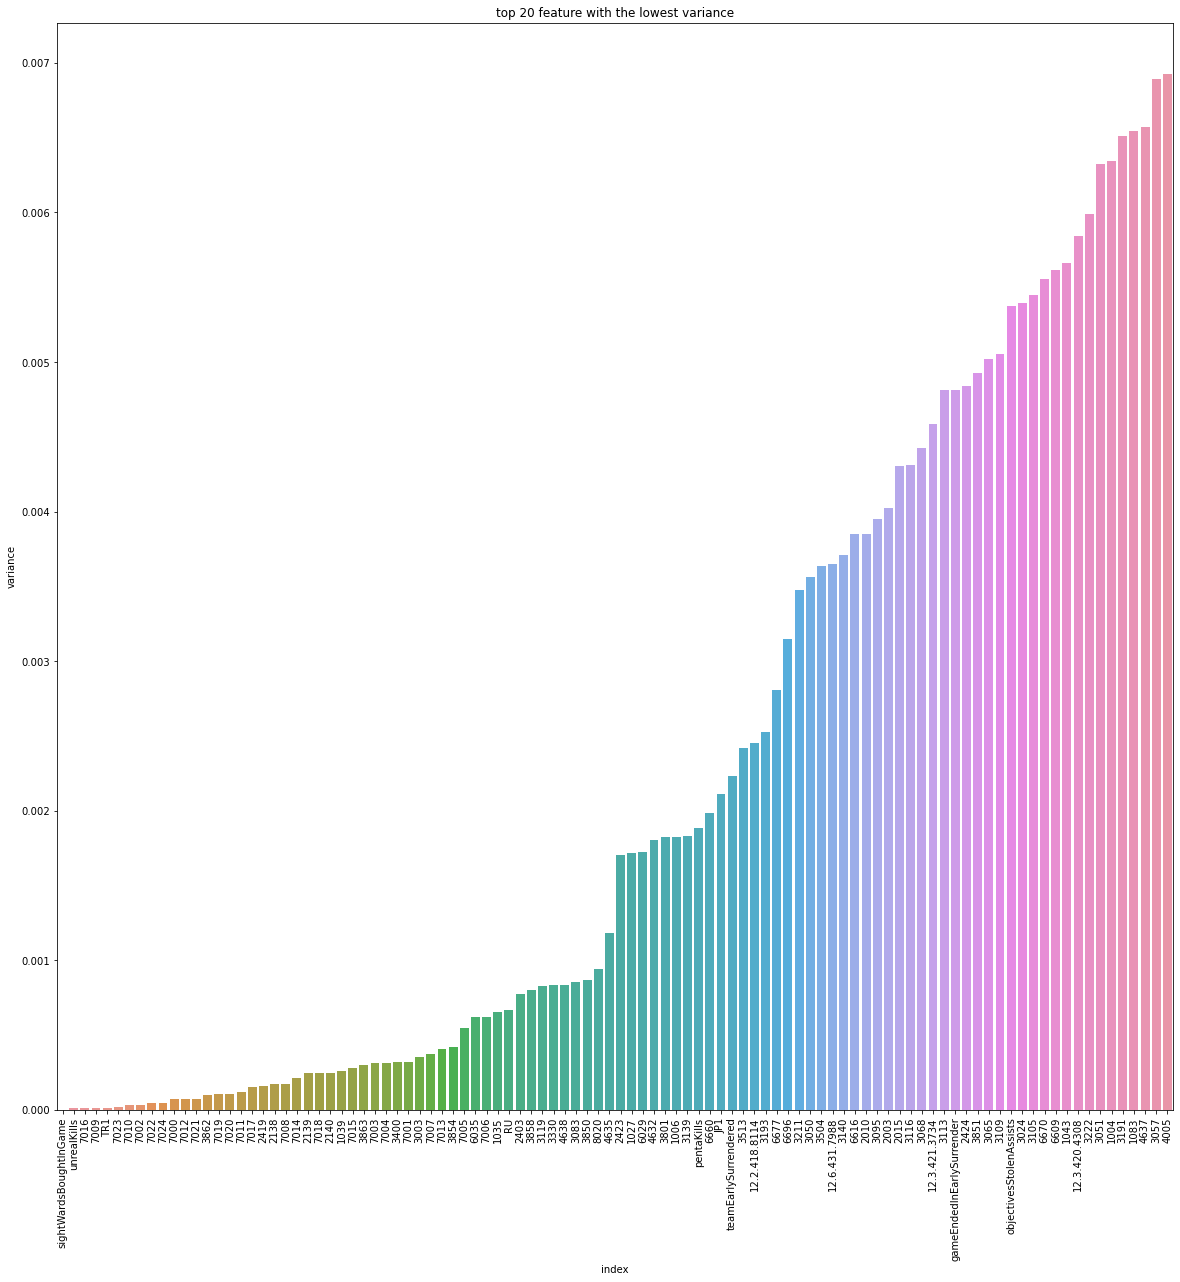

In [71]:
match_variance = match_variance.sort_values("variance", ascending=True)
match_variance
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.title("top 20 feature with the lowest variance")
sns.barplot(y="variance",x="index", data=match_variance[:100])

<AxesSubplot:title={'center':'top 20 feature with the lowest std'}, xlabel='index', ylabel='std'>

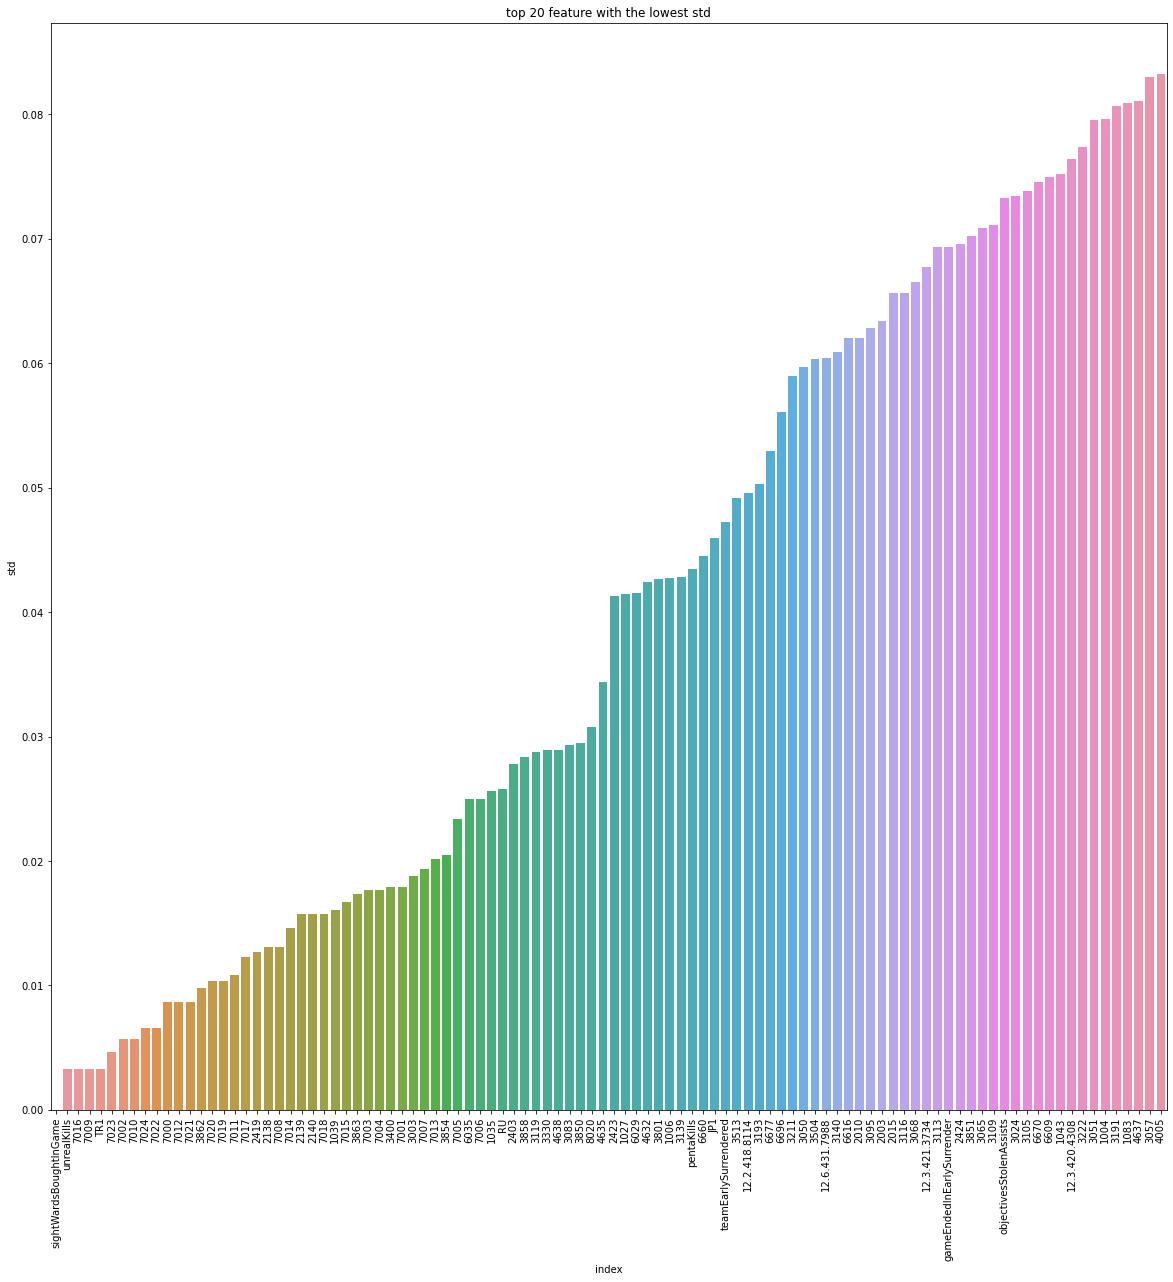

In [72]:
match_std = match_std.sort_values("std", ascending=True)
match_variance
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.title("top 20 feature with the lowest std")
sns.barplot(y="std",x="index", data=match_std[:100])

#### For Machine Learning purposes, we will drop features that are not one hot encoded and have a low amount of variation

In [73]:
to_remove = ["sightWardsBoughtInGame", "teamEarlySurrendered", "pentaKills", "gameEndedInEarlySurrender", "objectivesStolenAssists", "championTransform"]
match_df = match_df.drop(to_remove, axis=1) 

In [74]:
# plt.figure(figsize=(100,100))
match_variance = match_df.var().reset_index()
match_std = match_df.std().reset_index()
match_variance.rename(columns={0: "variance"}, inplace=True)
match_std.rename(columns={0: "std"}, inplace=True)

C:\Users\karna\AppData\Local\Temp\ipykernel_26880\3045131783.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  match_variance = match_df.var().reset_index()
C:\Users\karna\AppData\Local\Temp\ipykernel_26880\3045131783.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  match_std = match_df.std().reset_index()


### Let's see the new TOP 100

<AxesSubplot:title={'center':'top 20 feature with the lowest variance'}, xlabel='index', ylabel='variance'>

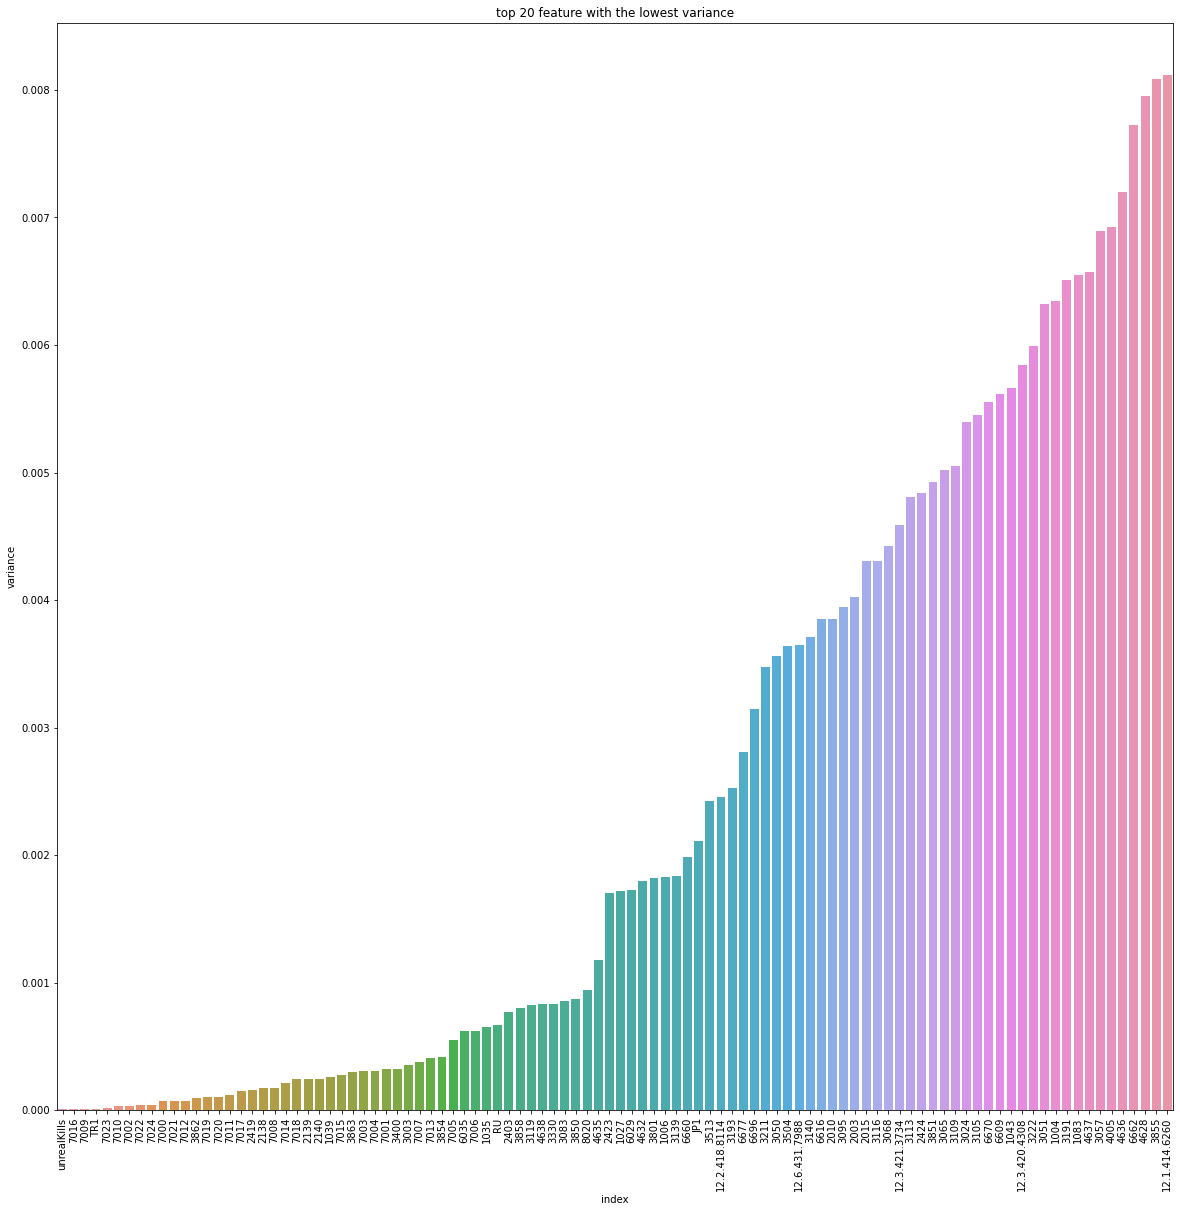

In [75]:
match_variance = match_variance.sort_values("variance", ascending=True)
match_variance
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.title("top 20 feature with the lowest variance")
sns.barplot(y="variance",x="index", data=match_variance[:100])

<AxesSubplot:title={'center':'top 20 feature with the lowest std'}, xlabel='index', ylabel='std'>

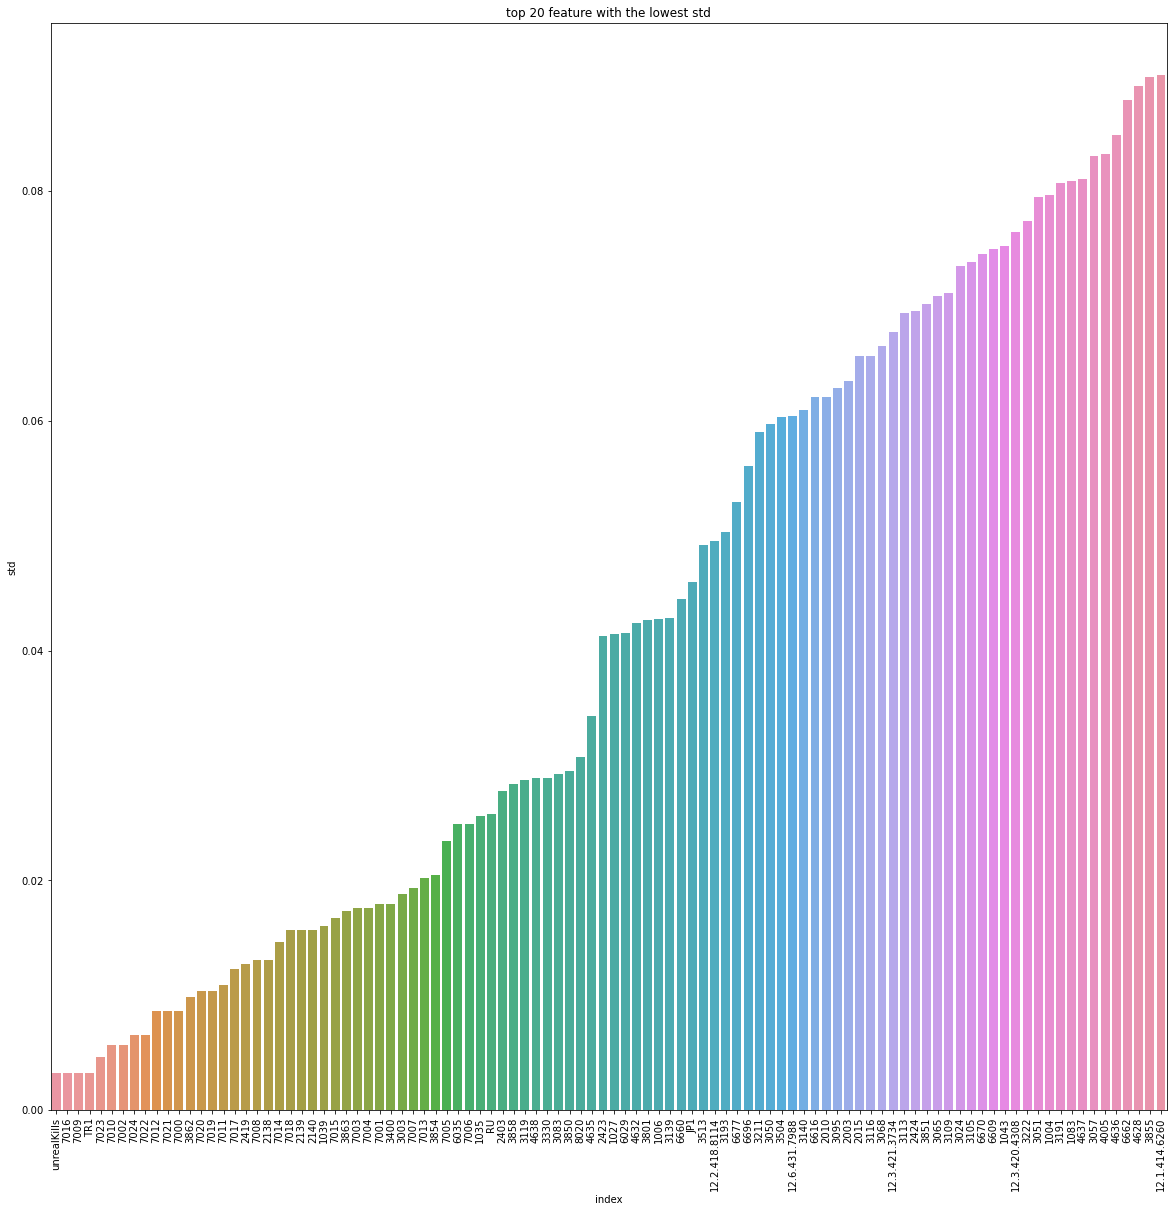

In [76]:
match_std = match_std.sort_values("std", ascending=True)
match_variance
plt.figure(figsize=(20,20))
plt.xticks(rotation=90)
plt.title("top 20 feature with the lowest std")
sns.barplot(y="std",x="index", data=match_std[:100])

#### We might remove items with low variation later 

In [77]:
to_remove = []

### Analysis of pairwise correlation

- df.corr() uses the pearson's coefficient which assumes that the variables are normally distributed


In [78]:
corr = match_df[[x for x in match_df.columns if x not in items.columns]].corr()

gameEndTimeStamp and gameStartTimeStamp are highly correlated (pos)

In [79]:
print("correlation vector damageDealtToBuildings")
to_remove.append("damageDealtToTurrets")
corr["damageDealtToBuildings"].sort_values()

correlation vector damageDealtToBuildings


visionWardsBoughtInGame   -0.240669
detectorWardsPlaced       -0.224640
turretsLost               -0.193025
wardsPlaced               -0.189621
nexusLost                 -0.187597
                             ...   
goldEarned                 0.563684
turretTakedowns            0.729260
turretKills                0.830039
damageDealtToTurrets       1.000000
damageDealtToBuildings     1.000000
Name: damageDealtToBuildings, Length: 98, dtype: float64

gameEndTimeStamp and gameStartTimeStamp are highly correlated (pos)

In [80]:
print("correlation vector goldEarned")
to_remove.append("goldSpent")
corr["goldEarned"].sort_values()

correlation vector goldEarned


gameEndedInSurrender             -0.312131
totalDamageShieldedOnTeammates   -0.130957
KR                               -0.111109
summoner1Id                      -0.083088
wardsPlaced                      -0.073588
                                    ...   
totalDamageDealtToChampions       0.876140
totalDamageDealt                  0.876282
champLevel                        0.887620
goldSpent                         0.969452
goldEarned                        1.000000
Name: goldEarned, Length: 98, dtype: float64

gameEndTimeStamp and gameStartTimeStamp are highly correlated (pos)

In [81]:
print("correlation vector consumablesPurchased")
to_remove.append("detectorWardsPlaced")
corr["consumablesPurchased"].sort_values()

correlation vector consumablesPurchased


totalMinionsKilled        -0.279389
totalDamageDealt          -0.220913
damageDealtToBuildings    -0.152554
damageDealtToTurrets      -0.152554
largestKillingSpree       -0.139687
                             ...   
visionScore                0.741592
wardsPlaced                0.789214
visionWardsBoughtInGame    0.861507
detectorWardsPlaced        0.894656
consumablesPurchased       1.000000
Name: consumablesPurchased, Length: 98, dtype: float64

In [82]:
to_remove.append("gameEndTimestamp")
to_remove.append("gameStartTimestamp")

In [83]:
to_remove

['damageDealtToTurrets',
 'goldSpent',
 'detectorWardsPlaced',
 'gameEndTimestamp',
 'gameStartTimestamp']

In [84]:
match_df.drop(to_remove, axis=1, inplace=True)

In [85]:
corr = match_df[[x for x in match_df.columns if x not in items.columns]].corr()

<AxesSubplot:>

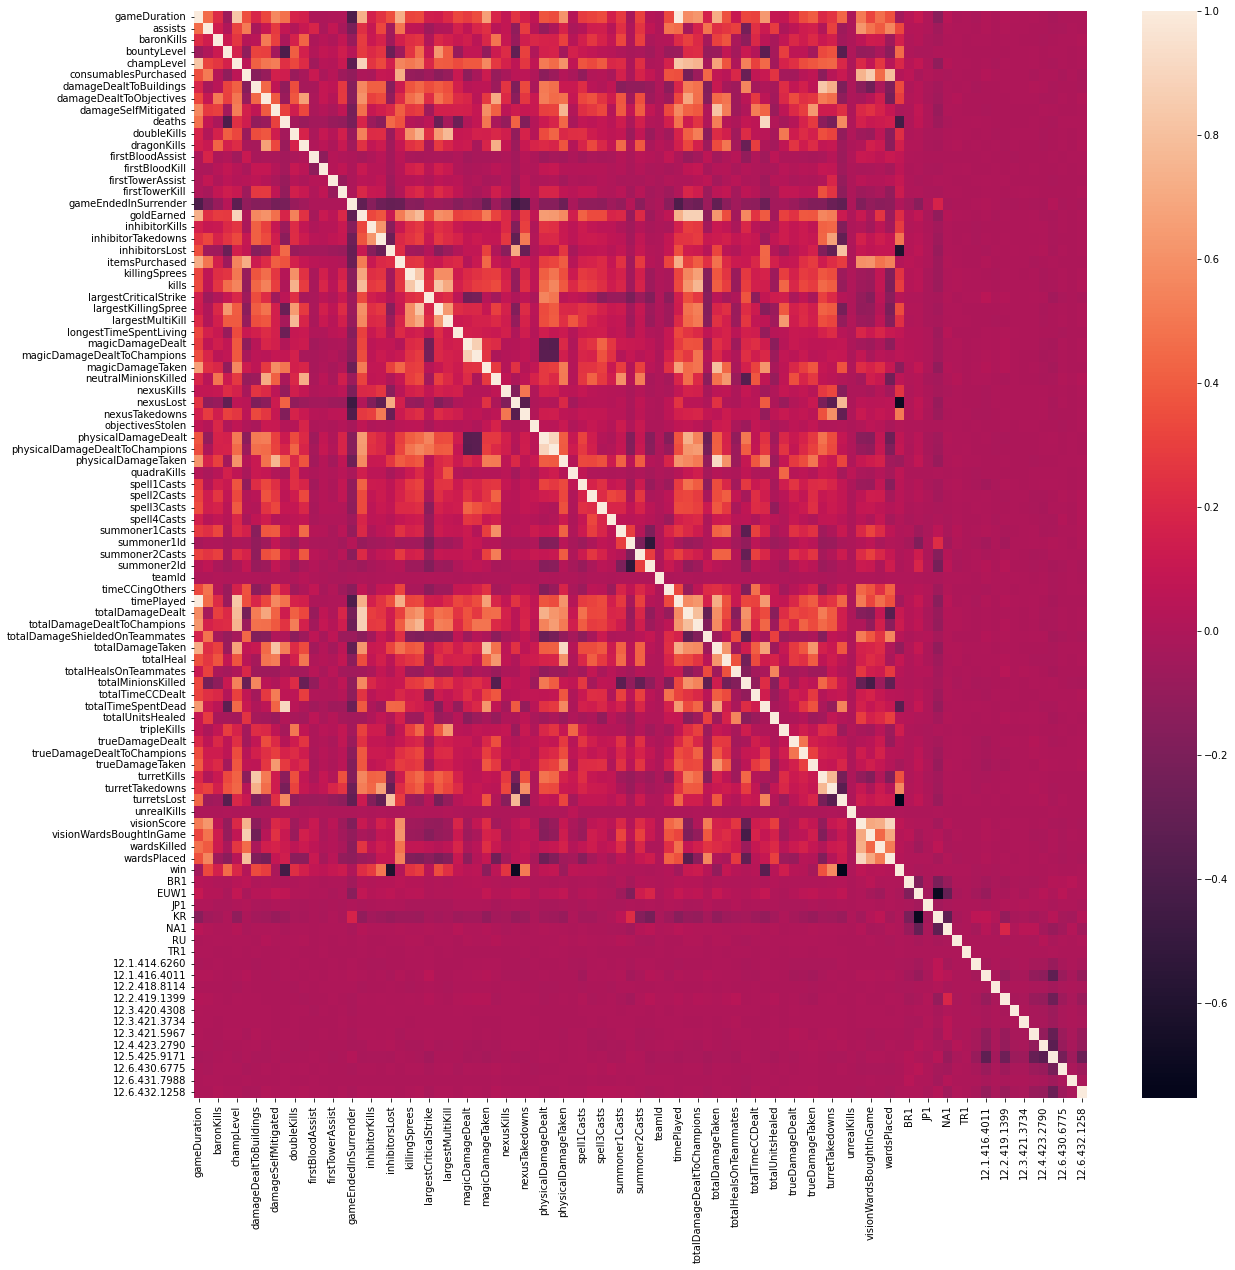

In [86]:
plt.figure(figsize=(20,20))
sns.heatmap(corr)

### Study of correlation with the target 

In [87]:
target_corr = corr["win"].sort_values()
target_corr

turretsLost          -0.753058
nexusLost            -0.694351
inhibitorsLost       -0.604275
deaths               -0.442798
totalTimeSpentDead   -0.345486
                        ...   
bountyLevel           0.453563
inhibitorTakedowns    0.494001
nexusTakedowns        0.512171
turretTakedowns       0.571375
win                   1.000000
Name: win, Length: 93, dtype: float64

In [88]:
### we will drop nexusLost  
match_df.drop("nexusLost", axis=1, inplace=True)

## Feature Standardization

In [89]:
# reconverting dates : 
match_df["gameCreation"] = match_df["gameCreation"].apply(lambda x : datetime.strptime(x, "%Y-%m-%d").timestamp()) 

In [90]:
# let's do some more one hot encoding
match_df = match_df.join(pd.get_dummies(match_df["championName"]))
match_df.drop("championName", axis=1, inplace=True)

In [91]:
match_df = match_df.join(pd.get_dummies(match_df["teamPosition"]))

In [92]:
match_df.drop("teamPosition", axis=1, inplace=True)

In [93]:
match_df["gameCreation"]

24006    1.641337e+09
61330    1.641337e+09
61331    1.641337e+09
8736     1.641337e+09
8735     1.641337e+09
             ...     
93839    1.649369e+09
93840    1.649369e+09
93841    1.649369e+09
91978    1.649369e+09
94479    1.649369e+09
Name: gameCreation, Length: 93099, dtype: float64

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = match_df[[col for col in match_df.columns if col != "win"]]
y = match_df["win"]
scaler.fit(X)
X[[col for col in X.columns]] = scaler.transform(X[[col for col in X.columns]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\karna\AppData\Local\Temp\ipykernel_26880\1955436953.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[[col for col in X.columns]] = scaler.transform(X[[col for col in X.columns]])


In [95]:
y

24006    1
61330    0
61331    0
8736     1
8735     0
        ..
93839    1
93840    1
93841    0
91978    0
94479    0
Name: win, Length: 93099, dtype: int32

In [96]:
X.describe()

,gameCreation,gameDuration,assists,baronKills,bountyLevel,champLevel,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageSelfMitigated,...,Zeri,Ziggs,Zilean,Zoe,Zyra,BOTTOM,JUNGLE,MIDDLE,TOP,UTILITY
count,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,...,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04,9.309900e+04
mean,4.026350e-14,-2.121252e-16,-8.962613e-16,5.289698e-15,7.170782e-16,1.849229e-15,6.792761e-15,-1.027262e-15,7.655946e-16,3.962024e-17,...,-3.307769e-14,7.754906e-15,5.932878e-16,-5.304202e-15,-1.630595e-14,-2.120642e-14,-9.691166e-15,2.000963e-14,9.385676e-15,2.890065e-14
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.134185e+00,-3.527363e+00,-1.387032e+00,-2.880991e-01,-5.305795e-01,-4.602829e+00,-1.465515e+00,-8.686677e-01,-9.234051e-01,-1.225475e+00,...,-1.663877e-01,-5.531591e-02,-5.909586e-02,-7.251550e-02,-3.075914e-02,-5.259828e-01,-5.001041e-01,-4.717603e-01,-5.050836e-01,-4.967621e-01
25%,-7.307868e-01,-6.727972e-01,-6.661273e-01,-2.880991e-01,-5.305795e-01,-5.180444e-01,-7.545424e-01,-7.389238e-01,-7.394986e-01,-6.566006e-01,...,-1.663877e-01,-5.531591e-02,-5.909586e-02,-7.251550e-02,-3.075914e-02,-5.259828e-01,-5.001041e-01,-4.717603e-01,-5.050836e-01,-4.967621e-01
50%,2.933144e-01,-1.972309e-02,-1.254491e-01,-2.880991e-01,-5.305795e-01,2.246436e-01,-2.805609e-01,-3.403621e-01,-3.657813e-01,-2.966951e-01,...,-1.663877e-01,-5.531591e-02,-5.909586e-02,-7.251550e-02,-3.075914e-02,-5.259828e-01,-5.001041e-01,-4.717603e-01,-5.050836e-01,-4.967621e-01
75%,8.243298e-01,6.544180e-01,5.954551e-01,-2.880991e-01,3.422799e-01,5.959876e-01,4.304114e-01,4.060300e-01,4.247746e-01,3.321352e-01,...,-1.663877e-01,-5.531591e-02,-5.909586e-02,-7.251550e-02,-3.075914e-02,-5.259828e-01,-5.001041e-01,-4.717603e-01,-5.050836e-01,-4.967621e-01
max,1.391694e+00,4.686097e+00,7.444046e+00,1.233390e+01,1.038016e+01,1.710020e+00,2.128560e+01,1.386849e+01,6.841707e+00,1.845497e+01,...,6.010059e+00,1.807798e+01,1.692166e+01,1.379016e+01,3.251066e+01,1.901203e+00,1.999584e+00,2.119720e+00,1.979870e+00,2.013036e+00


## Here is our final list of features : 


#### We decide to remove summoner Ids as they are clearly not strong indicator of the victory
We will also remove all features that are clear indicators of the victory

In [97]:
to_remove = ["summoner1Id", "summoner2Id", "unrealKills", 
             "nexusKills", "nexusTakedowns", 
             "gameEndedInSurrender"
            ]

X.drop(to_remove, axis=1, inplace=True)

C:\Users\karna\AppData\Local\Temp\ipykernel_26880\3722981740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(to_remove, axis=1, inplace=True)


In [98]:
for col in X.columns: 
    print("Column : ", col)

Column :  gameCreation
Column :  gameDuration
Column :  assists
Column :  baronKills
Column :  bountyLevel
Column :  champLevel
Column :  consumablesPurchased
Column :  damageDealtToBuildings
Column :  damageDealtToObjectives
Column :  damageSelfMitigated
Column :  deaths
Column :  doubleKills
Column :  dragonKills
Column :  firstBloodAssist
Column :  firstBloodKill
Column :  firstTowerAssist
Column :  firstTowerKill
Column :  goldEarned
Column :  inhibitorKills
Column :  inhibitorTakedowns
Column :  inhibitorsLost
Column :  itemsPurchased
Column :  killingSprees
Column :  kills
Column :  largestCriticalStrike
Column :  largestKillingSpree
Column :  largestMultiKill
Column :  longestTimeSpentLiving
Column :  magicDamageDealt
Column :  magicDamageDealtToChampions
Column :  magicDamageTaken
Column :  neutralMinionsKilled
Column :  objectivesStolen
Column :  physicalDamageDealt
Column :  physicalDamageDealtToChampions
Column :  physicalDamageTaken
Column :  quadraKills
Column :  spell1Cas

In [99]:
print("Final shape : ", X.shape)

Final shape :  (93099, 473)


## 2) Machine Learning

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_selection import RFE

models = {
    "Nearest Neighbors" : KNeighborsClassifier(3), 
    "Linear SVM": SVC(kernel="linear", C=0.025), 
    "Decision Tree" : DecisionTreeClassifier(), 
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), 
    "Naive Bayes" : GaussianNB()
}

#### A) Naive training of all classifiers and data prep

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [274]:
def f_importances(imp, names, model_name, type):
	size = 50
	imp, names = zip(*sorted(zip(imp, names)))
	imp, names = np.array(imp), np.array(names)
	if type == "coef":
		imp_tmp, names_tmp = imp[-size:], names[-size:]
		plt.figure(figsize=(20, 20))
		plt.barh(range(len(names_tmp)), imp_tmp, align='center')
		plt.yticks(range(len(names_tmp)), names_tmp)
		plt.title(str(model_name + " positiv impact"))
		plt.show()

		imp_tmp, names_tmp = imp[:size], names[:size]
		plt.figure(figsize=(20, 20))
		plt.barh(range(len(names_tmp)), imp_tmp, align='center')
		plt.yticks(range(len(names_tmp)), names_tmp)
		plt.title(str(model_name + " negativ impact"))
		plt.show()
	else:
		# last_index_zero = int(np.argwhere(imp == imp[0])[-1])+1 # La plupart des poids sont a 0
		# imp_tmp, names_tmp = imp[last_index_zero:], names[last_index_zero:]
		# plt.figure(figsize=(20, 20))
		# plt.barh(range(len(names_tmp)), imp_tmp, align='center')
		# plt.yticks(range(len(names_tmp)), names_tmp)
		# plt.title(str(model_name + " impact"))
		# plt.show()

		imp_tmp, names_tmp = imp[-size:], names[-size:]
		plt.figure(figsize=(20, 20))
		plt.barh(range(len(names_tmp)), imp_tmp, align='center')
		plt.yticks(range(len(names_tmp)), names_tmp)
		plt.title(str(model_name + " impact"))
		plt.show()

def train_and_save(model, X_train, X_test, y_train, y_test, path_suff): 
	"""
		Training the model and save the classification results
	"""
	model.fit(X_train, y_train)
	model_name = model.__class__.__name__
	print("--- Training : done ---")
	preds = model.predict(X_test)
	print(classification_report(preds, y_test))
	rep = classification_report(preds, y_test, output_dict=True)
	
	## Can't get feature importance with KNeighborsClassifier and GaussianNB
	if model_name != "KNeighborsClassifier" and model_name != "GaussianNB":
		print("--- Showing feature importance ---")
		names = [str(e) for e in X_train.columns]
		if model_name == "DecisionTreeClassifier" or model_name == "RandomForestClassifier":
			f_importances(model.feature_importances_, names, model_name, "feature_importance")
		else:
			f_importances(model.coef_[0], names, model_name, "coef")

		# rfe = RFE(estimator=model, n_features_to_select=None, step=1)
		# rfe.fit(X_train, y_train)
		# ranking = rfe.ranking_
		

	df_report = pd.DataFrame(rep).transpose()
	path_name = f"{path_suff}_{model_name}.csv"
	df_report.to_csv(path_name)

	print("results saved to ", path_name)

--- Loading Nearest Neighbors ---
--- Training : done ---
              precision    recall  f1-score   support

           0       0.74      0.67      0.71     14468
           1       0.68      0.74      0.71     13462

    accuracy                           0.71     27930
   macro avg       0.71      0.71      0.71     27930
weighted avg       0.71      0.71      0.71     27930

results saved to  naive_KNeighborsClassifier.csv
--- Loading Linear SVM ---
--- Training : done ---
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     13353
           1       0.96      0.97      0.97     14577

    accuracy                           0.97     27930
   macro avg       0.97      0.97      0.97     27930
weighted avg       0.97      0.97      0.97     27930

--- Showing feature importance ---


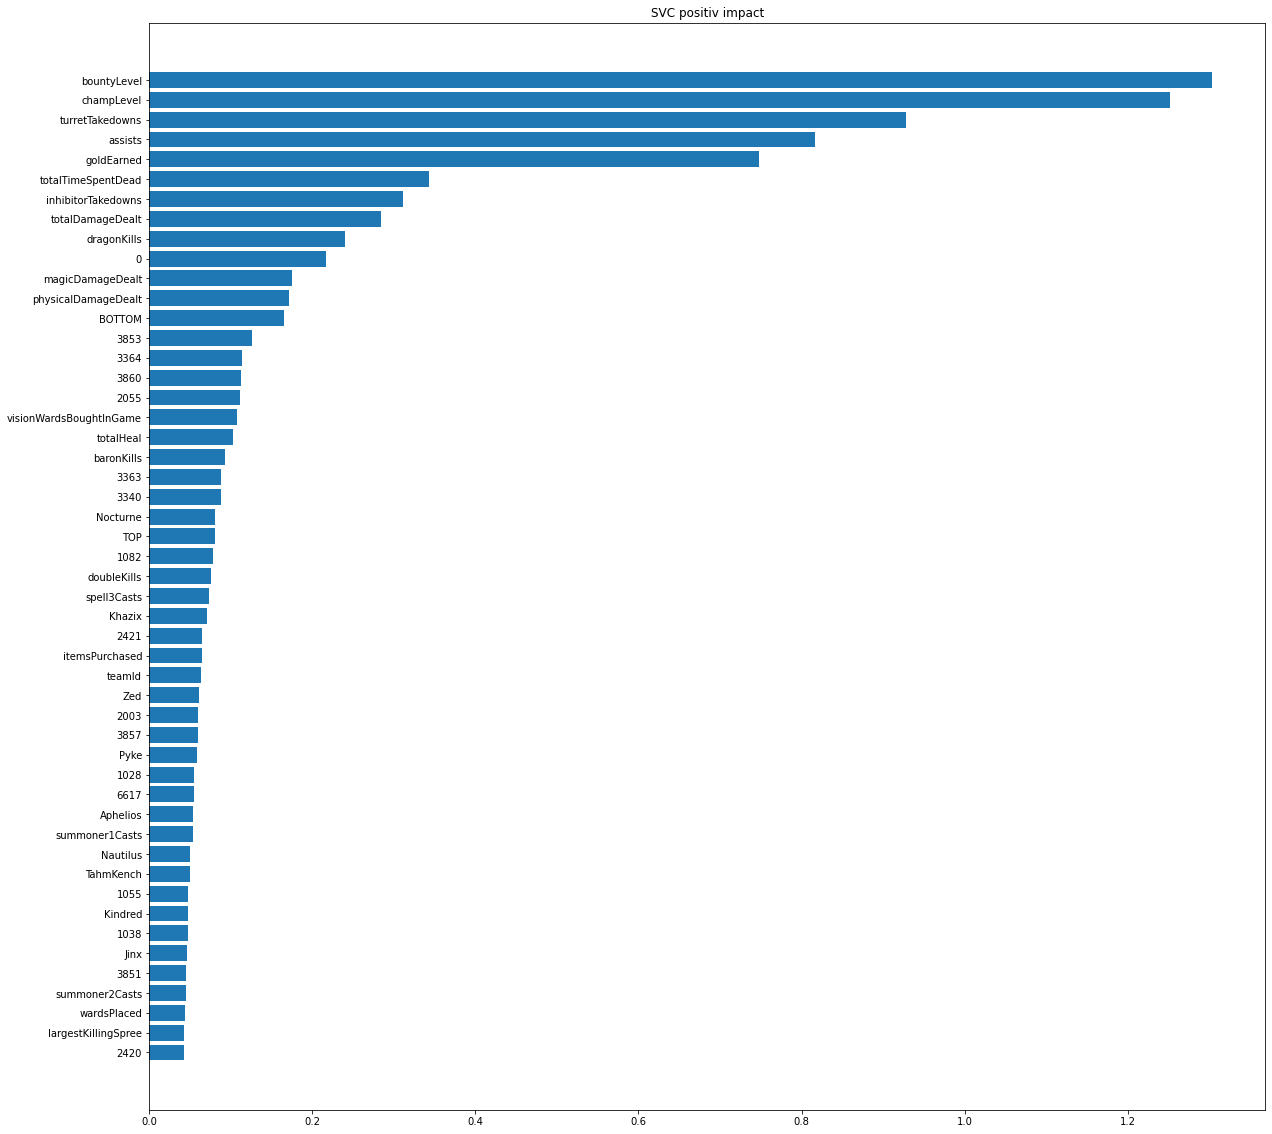

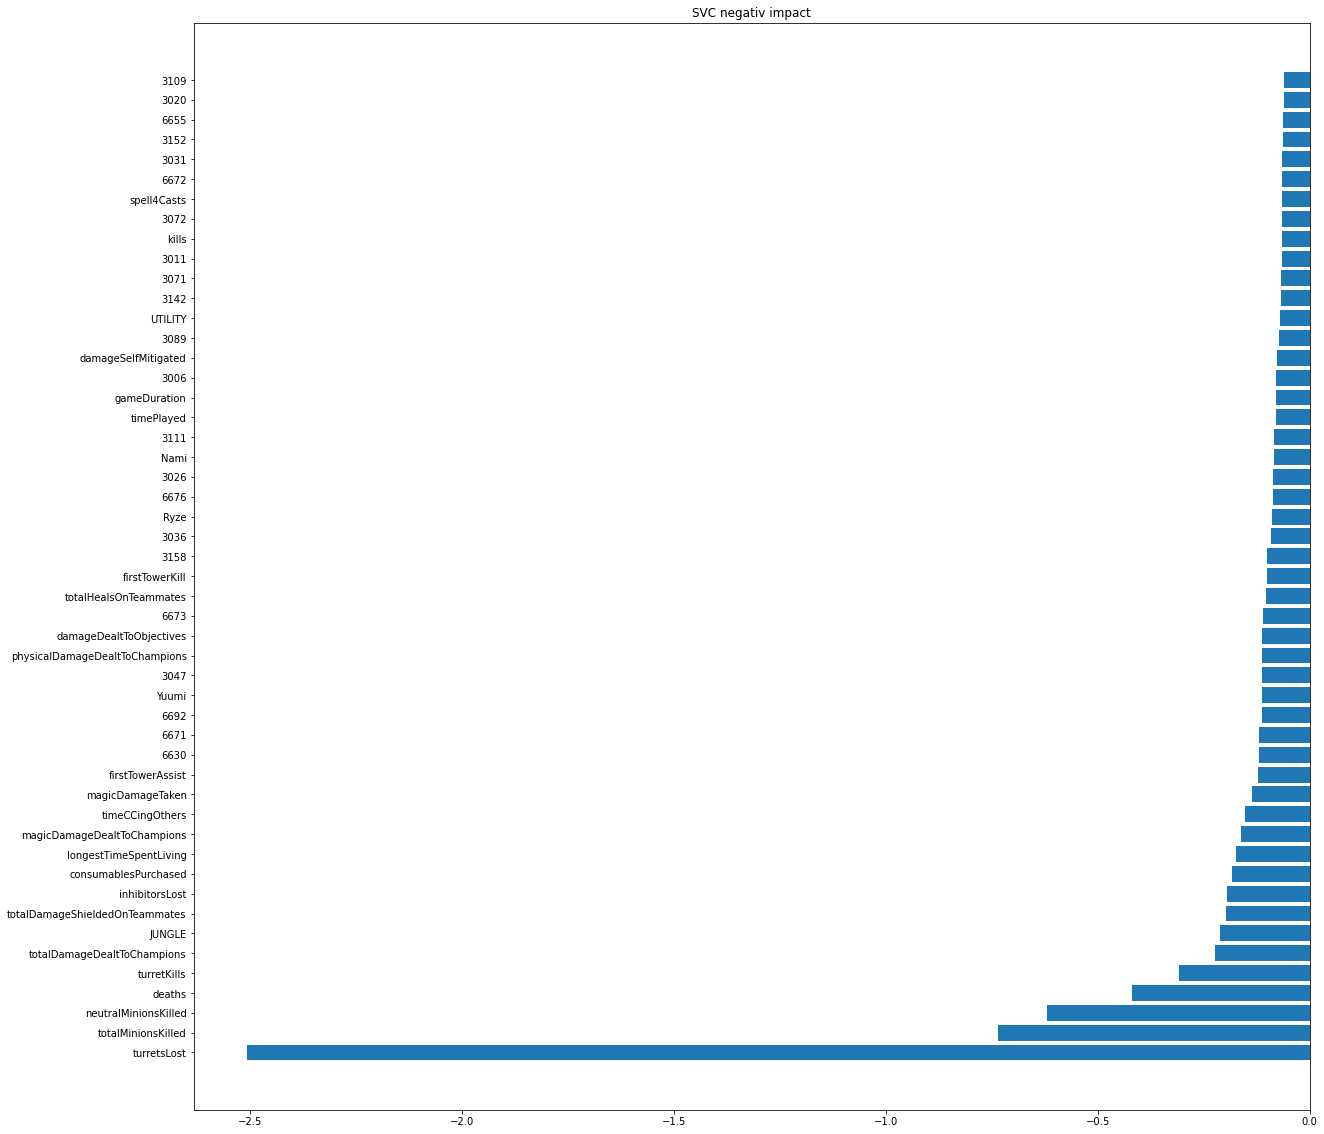

results saved to  naive_SVC.csv
--- Loading Decision Tree ---
--- Training : done ---
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     13243
           1       0.95      0.95      0.95     14687

    accuracy                           0.95     27930
   macro avg       0.95      0.95      0.95     27930
weighted avg       0.95      0.95      0.95     27930

--- Showing feature importance ---


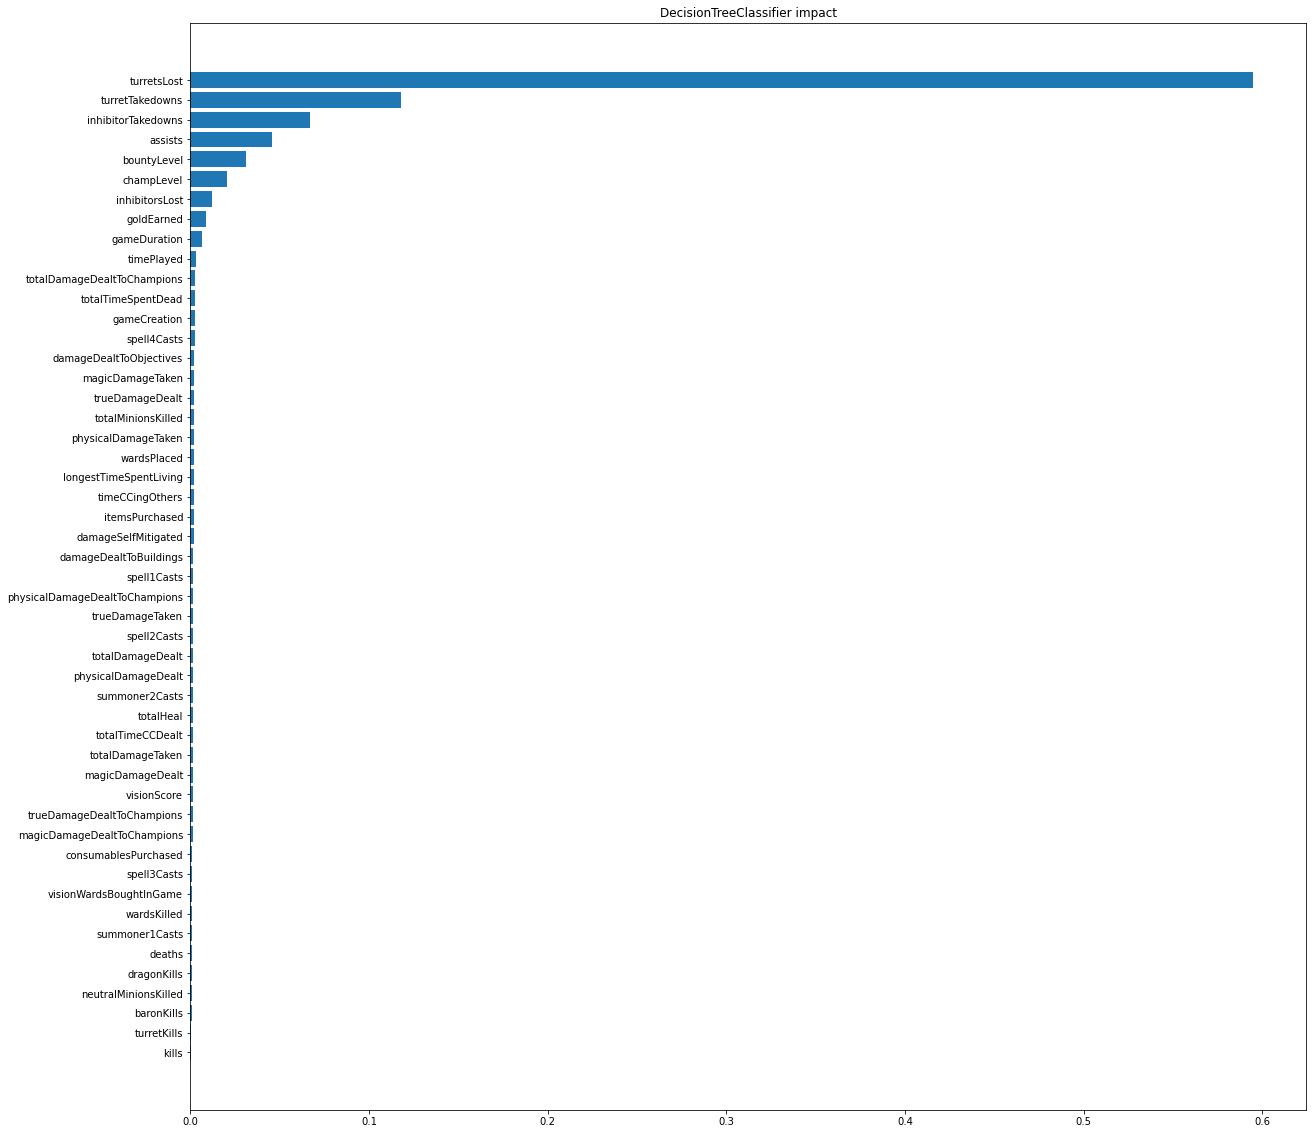

results saved to  naive_DecisionTreeClassifier.csv
--- Loading Random Forest ---
--- Training : done ---
              precision    recall  f1-score   support

           0       0.21      0.81      0.34      3486
           1       0.96      0.57      0.72     24444

    accuracy                           0.60     27930
   macro avg       0.59      0.69      0.53     27930
weighted avg       0.86      0.60      0.67     27930

--- Showing feature importance ---


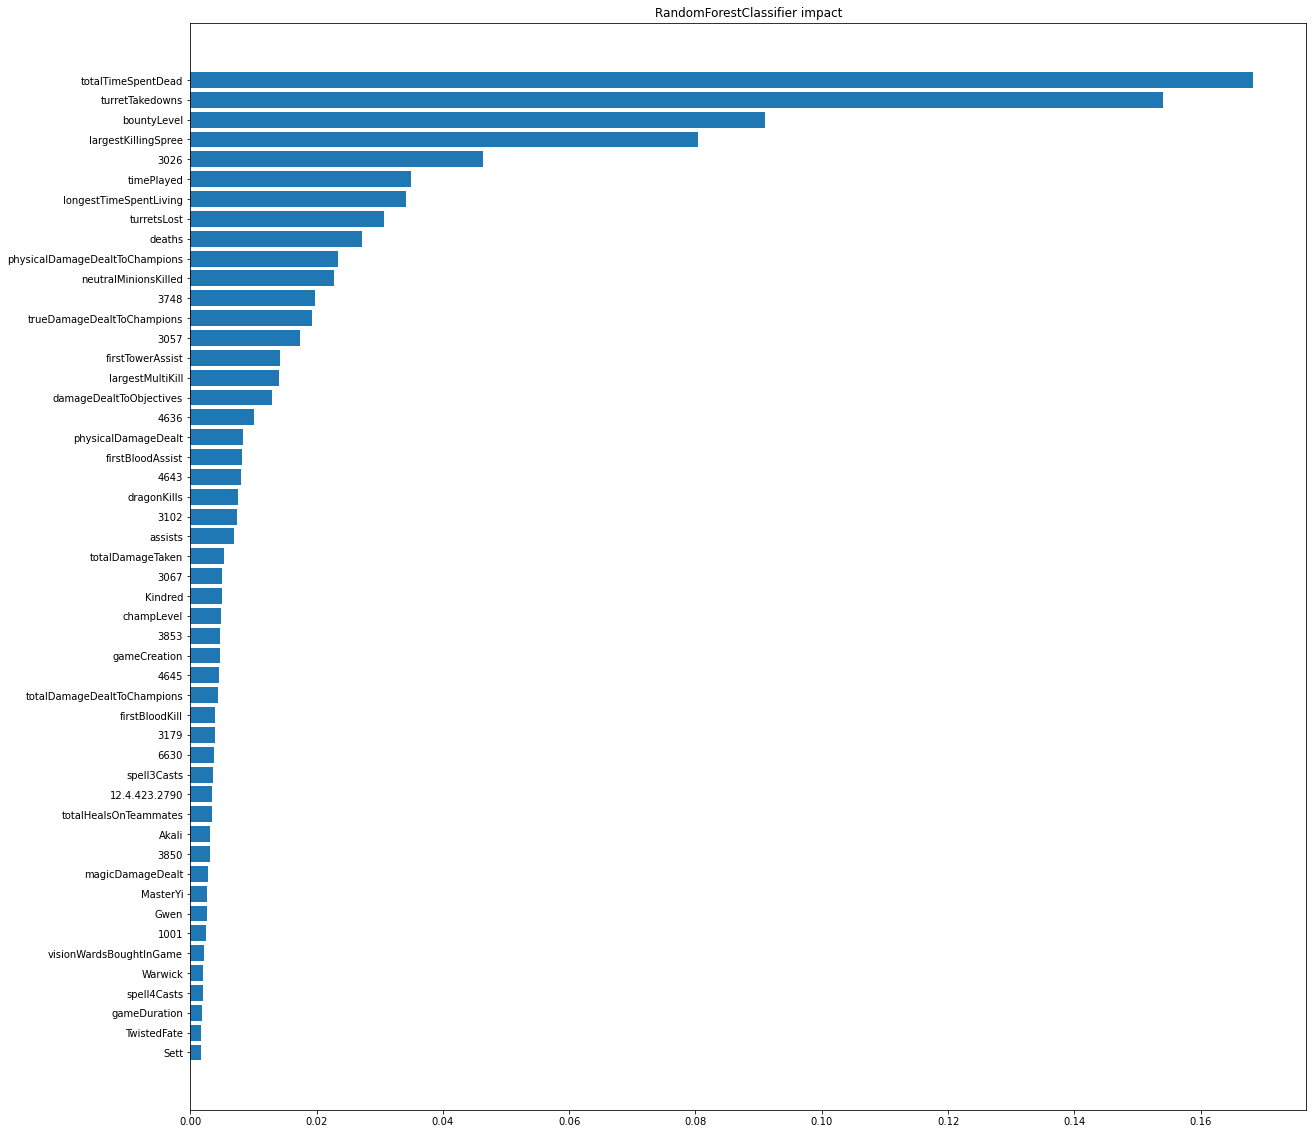

results saved to  naive_RandomForestClassifier.csv
--- Loading Naive Bayes ---
--- Training : done ---
              precision    recall  f1-score   support

           0       0.94      0.59      0.73     20902
           1       0.42      0.88      0.57      7028

    accuracy                           0.67     27930
   macro avg       0.68      0.74      0.65     27930
weighted avg       0.81      0.67      0.69     27930

results saved to  naive_GaussianNB.csv


In [275]:
import warnings # J'en peux plus des warnings dsl
warnings.filterwarnings("ignore")

# training 
for i, model_name in enumerate(models.keys()): 
    print(f"--- Loading {model_name} ---")
    model = models[model_name]
    train_and_save(model, X_train, X_test, y_train, y_test, path_suff="naive")   

# KNN : no feature importance
# GaussianNB : no feature importance 
# SVM : coef_
# DecisionTree : feature_importances_
# RFC : feature_importances_